In [110]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
from matplotlib.colors import LogNorm

In [111]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [112]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

from scipy import integrate

In [15]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/exp/"
epgExpInb = pd.read_pickle(parent_exp + "dvcs.pkl")
epgExpInbCDFT = epgExpInb.loc[epgExpInb.config == 3]
epgExpInbCD = epgExpInb.loc[epgExpInb.config == 2]
epgExpInbFD = epgExpInb.loc[epgExpInb.config == 1]

In [19]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/exp/"
epgExpOutb = pd.read_pickle(parent_exp + "dvcs.pkl")
epgExpOutbCDFT = epgExpOutb.loc[epgExpOutb.config == 3]
epgExpOutbCD = epgExpOutb.loc[epgExpOutb.config == 2]
epgExpOutbFD = epgExpOutb.loc[epgExpOutb.config == 1]

In [23]:
epgExp = pd.concat([epgExpInb, epgExpOutb])

In [79]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/exp/"
pi0ExpInb = pd.read_pickle(parent_exp + "pi0.pkl")
pi0ExpInbCDFT = pi0ExpInb.loc[pi0ExpInb.config == 3]
pi0ExpInbCD = pi0ExpInb.loc[pi0ExpInb.config == 2]
pi0ExpInbFD = pi0ExpInb.loc[pi0ExpInb.config == 1]

In [80]:
parent_exp = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/outb/exp/"
pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")
pi0ExpOutbCDFT = pi0ExpOutb.loc[pi0ExpOutb.config == 3]
pi0ExpOutbCD = pi0ExpOutb.loc[pi0ExpOutb.config == 2]
pi0ExpOutbFD = pi0ExpOutb.loc[pi0ExpOutb.config == 1]

In [130]:
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/dvcs/"
dvcsSimInb = pd.read_pickle(parent_MC + "3987.pkl")
parent_MC = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/bkg_1g/"
bkgSimInb = pd.read_pickle(parent_MC + "4076.pkl")

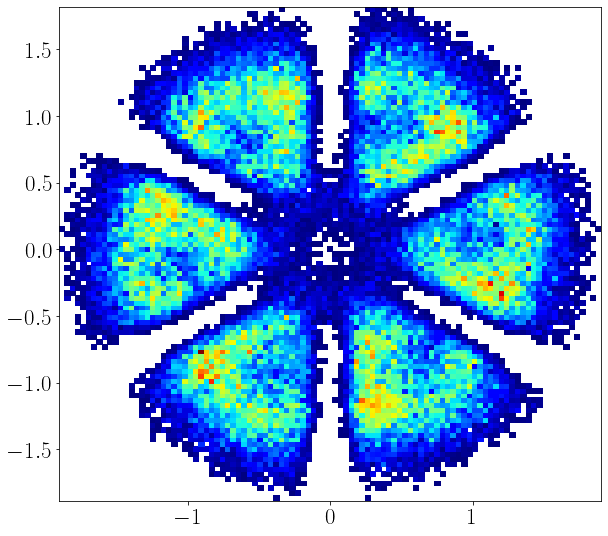

In [184]:
plt.hist2d(bkgSimInb.GenPipx, bkgSimInb.GenPipy, bins = 101, cmap = cmap, cmin = 1)
plt.show()

In [142]:
nonrad = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/test/2942.pkl")

In [150]:
pi0gen = pd.read_pickle("/Volumes/Extreme SSD/Feb2022/nominal/pi0gen.pkl")

In [157]:
gam.to_numpy()

array([[ 0.29858804, -0.08270822,  0.90781069],
       [ 0.10798761, -0.04973371,  1.65762186],
       [ 0.26864755, -0.65607739,  2.21909332],
       ...,
       [-0.41894287,  0.13827228,  1.87305856],
       [-0.28899354, -0.18088527,  2.50850487],
       [ 0.23810692, -0.33797967,  0.46228349]])

In [158]:
gam = pi0gen.loc[:, ["Gpx", "Gpy", "Gpz"]]
gam2 = pi0gen.loc[:, ["Gpx2", "Gpy2", "Gpz2"]]
openingAngle_gen = angle(gam.to_numpy().T, gam2.to_numpy().T)

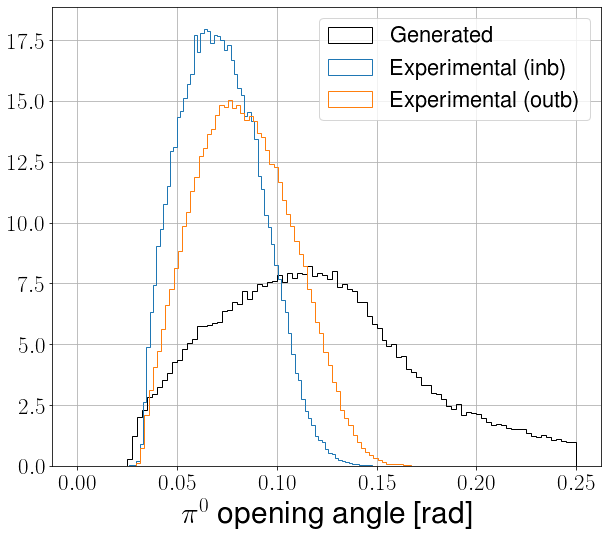

In [168]:
plt.rcParams["figure.figsize"] = (9, 8)

plt.hist(np.radians(openingAngle_gen), bins = np.linspace(0, 0.25, 101), histtype = 'step', color = 'k', density = True, label = 'Generated')
np.radians(pi0ExpInb.openingAngle).hist(bins = 101, density = True, histtype = 'step', label = "Experimental (inb)")
np.radians(pi0ExpOutb.openingAngle).hist(bins = 101, density = True, histtype = 'step', label = "Experimental (outb)")
plt.legend(loc='upper right')

plt.xlabel(r"$\pi^0$"+" opening angle" + "  [rad]")
plt.show()

In [145]:
pol = "inbending"
def cubic(args, x): #equivalent to poly1d
    a, b, c, d = args
    return a*x**3 +b*x**2 + c*x + d
regulator = np.abs(2*(1/(1+np.exp(-(nonrad.loc[nonrad["Psector"]>7, "Pp"]-0.3)/0.01))-0.5))
sigma1_CD = np.where(nonrad.loc[nonrad["Psector"]>7, "Pp"]<0.85, cubic([0.0926, 0.137, -0.230, 0.139], nonrad.loc[nonrad["Psector"]>7, "Pp"]), 0.1)
sigma2_CD = np.where(nonrad.loc[nonrad["Psector"]>7, "Pp"]<1.34, cubic([-2.797, 9.351, -9.488, 3.503], nonrad.loc[nonrad["Psector"]>7, "Pp"]), 0.85)
sigma3_CD = 0.8 + 2.2/(1+np.exp(5.518*(nonrad.loc[nonrad.Psector>7, "Pp"]-0.625)))
nonrad.loc[nonrad["Psector"]>7, "Pp"] = nonrad.loc[nonrad["Psector"]>7, "Pp"]*np.random.normal(1, regulator*sigma1_CD, len(nonrad.loc[nonrad.Psector>7]))
nonrad.loc[nonrad["Psector"]>7, "Ptheta"] = nonrad.loc[nonrad["Psector"]>7, "Ptheta"] + np.random.normal(0, sigma2_CD, len(nonrad.loc[nonrad.Psector>7]))
nonrad.loc[nonrad["Psector"]>7, "Pphi"] = nonrad.loc[nonrad["Psector"]>7, "Pphi"] + np.random.normal(0, sigma3_CD, len(nonrad.loc[nonrad.Psector>7])) 
#FD proton
args_sigmas_FD_inb = [[-0.233, 1.216, -2.279, 1.812, -0.445], [ 0.277, -1.366, 2.318, -1.619,  0.466 ],[ 0.0728, -0.223, 0.0888,  0.225, -0.0889],[-0.204, 0.977, -1.766, 1.411, -0.342], [ 0.277, -1.059, 1.362, -0.641, 0.137], [-0.219, 1.132, -2.153, 1.763, -0.447]]
args_sigmas_FD_outb = [[0.481,-1.548, 1.524,-0.415, 0.0277], [1.872, -8.054, 12.536, -8.358,  2.083], [-0.0656, 0.480, -1.191, 1.169, -0.315], [-1.559, 7.356, -12.639, 9.312,  -2.405], [ 0.189, -0.344, -0.253,  0.717, -0.238], [0.466, -1.560, 1.622, -0.485, 0.0322]]
def quartic(x, sector, pol = "inbending"):
    if pol == "inbending":
        a, b, c, d, e = args_sigmas_FD_inb[sector - 1]
        return np.select( [x<0.55, (x>=0.55)& (x < 1.55), x>=1.55], [a*0.55**4+b*0.55**3+c*0.55**2+d*0.55+e, a*x**4 +b*x**3 + c*x**2 + d*x + e, a*1.55**4 + b*1.55**3 + c*1.55**2+d*1.55 +e])
    if pol == "outbending":
        a, b, c, d, e = args_sigmas_FD_outb[sector - 1]
        return np.select( [x<0.65, (x>=0.65)& (x < 1.55), x>=1.55], [a*0.65**4+b*0.65**3+c*0.65**2+d*0.65+e, a*x**4 +b*x**3 + c*x**2 + d*x + e, a*1.55**4 + b*1.55**3 + c*1.55**2+d*1.55 +e])
def sigmaFDOutb(x):
    return np.select([x<.95, (x>=.95) & (x<1.2), (x>=1.2)&(x<1.575), (x>=1.575) & (x<1.9), (x>1.9)], [0.1, -0.045/(1.2-.95)*x+1.2*0.045/(1.2-.95) + 0.055, 0.055, -0.015/(1.9-1.575)*x+1.9*0.015/(1.9-1.575) + 0.04,0.04])

for sector in range(1, 7):
    if pol == "inbending":
        regulator = (1/(1+np.exp(-(nonrad.loc[nonrad["Psector"]==sector, "Pp"]-0.5)/0.05)))
        sigmas_FD = quartic(nonrad.loc[nonrad.Psector == sector, "Pp"], sector, pol)
    elif pol == "outbending":
        regulator = (1/(1+np.exp(-(nonrad.loc[nonrad["Psector"]==sector, "Pp"]-0.6)/0.05)))
        sigmas_FD = sigmaFDOutb(nonrad.loc[nonrad["Psector"]==sector, "Pp"]) #quartic(nonrad.loc[nonrad.Psector == sector, "Pp"], sector, pol)
    nonrad.loc[nonrad["Psector"]==sector, "Pp"] = nonrad.loc[nonrad["Psector"]==sector, "Pp"]*np.random.normal(1, regulator*sigmas_FD, len(nonrad.loc[nonrad["Psector"]==sector, "Pp"]))

#moduli proton phi
nonrad.loc[:, "Pphi"] = np.where(nonrad.loc[:, "Pphi"]%360<180, nonrad.loc[:, "Pphi"]%360, nonrad.loc[:, "Pphi"]%360-360)

nonrad.loc[:, "Ppx"] = nonrad.loc[:, "Pp"]*np.sin(np.radians(nonrad.loc[:, "Ptheta"]))*np.cos(np.radians(nonrad.loc[:, "Pphi"]))
nonrad.loc[:, "Ppy"] = nonrad.loc[:, "Pp"]*np.sin(np.radians(nonrad.loc[:, "Ptheta"]))*np.sin(np.radians(nonrad.loc[:, "Pphi"]))
nonrad.loc[:, "Ppz"] = nonrad.loc[:, "Pp"]*np.cos(np.radians(nonrad.loc[:, "Ptheta"]))

pro = [nonrad['Ppx'], nonrad['Ppy'], nonrad['Ppz']]
nonrad.loc[:, 'Pe'] = getEnergy(pro, M)

#smearing photon
gam = [nonrad['Gpx'], nonrad['Gpy'], nonrad['Gpz']]
nonrad.loc[:, 'Gp'] = mag(gam)
nonrad.loc[:, 'Gtheta'] = getTheta(gam)
nonrad.loc[:, 'Gphi'] = getPhi(gam)
#FT photon
nonrad.loc[nonrad["Gsector"]>7, "Gp"] = nonrad.loc[nonrad["Gsector"]>7, "Gp"]*np.random.normal(1, 0.013 + 0.003/(1+np.exp(0.761*(nonrad.loc[nonrad["Gsector"]>7, "Gp"]-6))), len(nonrad.loc[nonrad.Gsector>7]))
#FD photon
nonrad.loc[nonrad["Gsector"]<7, "Gp"] = nonrad.loc[nonrad["Gsector"]<7, "Gp"]*np.random.normal(1, 0.0395/(1+np.exp(5.308*(nonrad.loc[nonrad["Gsector"]<7, "Gp"]- 8.005))), len(nonrad.loc[nonrad.Gsector<7]))


In [144]:
nonrad.Gp

0         6.468884
1         6.271639
2         6.823340
3         7.006549
4         8.236406
            ...   
771274    4.038901
771275    7.291722
771276    7.500874
771277    6.523858
771278    7.557070
Name: Gp, Length: 771279, dtype: float64

In [147]:
def saveDVCSvars(df):
    #set up dvcs variables
    df_epg = copy(df)

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg


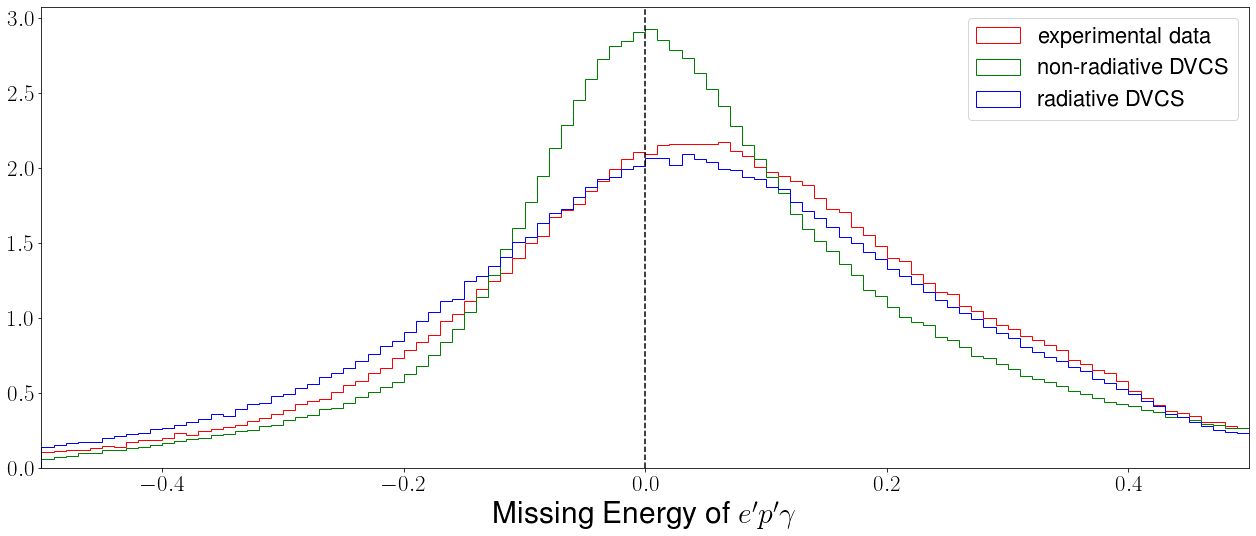

In [149]:
plt.rcParams["figure.figsize"] = (18, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

plt.hist(epgExpInb.ME_epg, bins = np.linspace(-0.5, 0.5, 101), histtype = 'step', density = True, label = 'experimental data', color = 'r')
plt.hist(saveDVCSvars(nonrad).ME_epg, bins = np.linspace(-0.5, 0.5, 101), histtype = 'step', density = True, label = 'non-radiative DVCS', color = 'g')
plt.hist(dvcsSimInb.ME_epg, bins = np.linspace(-0.5, 0.5, 101), histtype = 'step', density = True, label = 'radiative DVCS', color = 'b')
plt.axvline(0, color = 'k', linestyle = '--')
plt.xlim([-0.5, 0.5])
plt.xlabel("Missing Energy of "+r"$e'p'\gamma$")
plt.legend(loc = 'upper right')
plt.show()

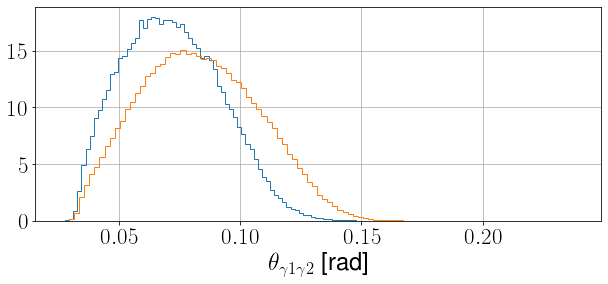

In [85]:
np.radians(pi0ExpInb.openingAngle).hist(bins = 101, density = True, histtype = 'step')
np.radians(pi0ExpOutb.openingAngle).hist(bins = 101, density = True, histtype = 'step')
plt.xlabel(r"$\theta_{\gamma1\gamma2}$" + " [rad]")
plt.show()

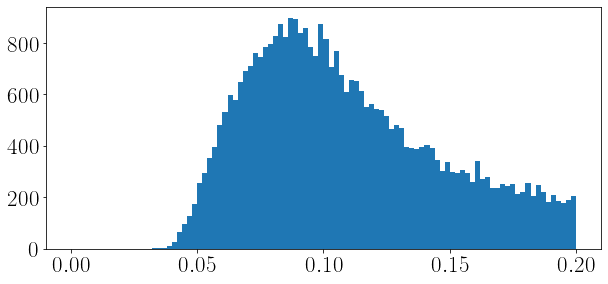

In [102]:
plt.hist(np.radians(angle(gam.to_numpy().T, gam2.to_numpy().T)), bins = np.linspace(0, 0.2, 101))
plt.show()

In [97]:
gam

,GenGpx,GenGpy,GenGpz
0,-1.052677,1.021925,3.036574
1,0.952258,1.234092,4.705500
2,0.613931,-1.083768,5.308757
3,1.058187,-0.992459,3.836623
4,1.414957,-0.228656,2.677866
...,...,...,...
49436,-1.054718,0.130582,5.934037
49437,0.246680,1.151103,3.992150
49438,-1.201408,-0.884116,3.339958
49439,-1.090824,0.371924,3.550563


In [186]:
a = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/1-4/2814_1g_CD_0.pkl")
# gam = a.loc[:, ["GenGpx", "GenGpy", "GenGpz"]]
# gam2 = a.loc[:, ["GenGpx2", "GenGpy2", "GenGpz2"]]

In [198]:
a.GenGp

0        4.049960
1        0.947410
2        0.808450
3        4.063550
4        3.372424
           ...   
71446    0.738617
71447    6.964258
71448    0.157769
71449    0.524018
71450    0.079020
Name: GenGp, Length: 71451, dtype: float64

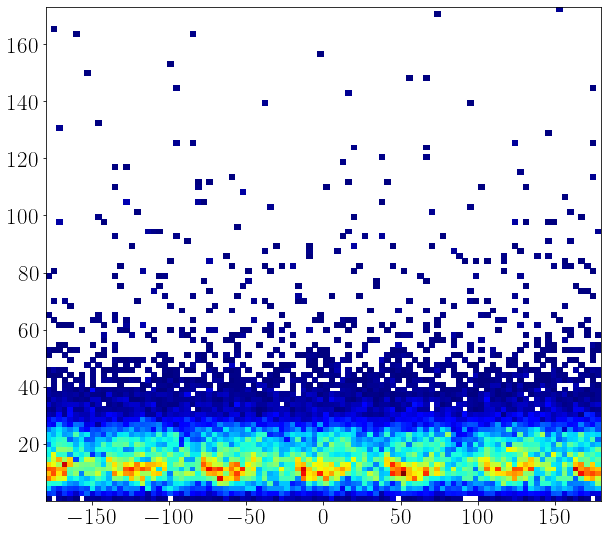

In [199]:
plt.hist2d(a.GenGphi, a.GenGtheta, bins  = 100, cmap = cmap, cmin = 1)
plt.show()

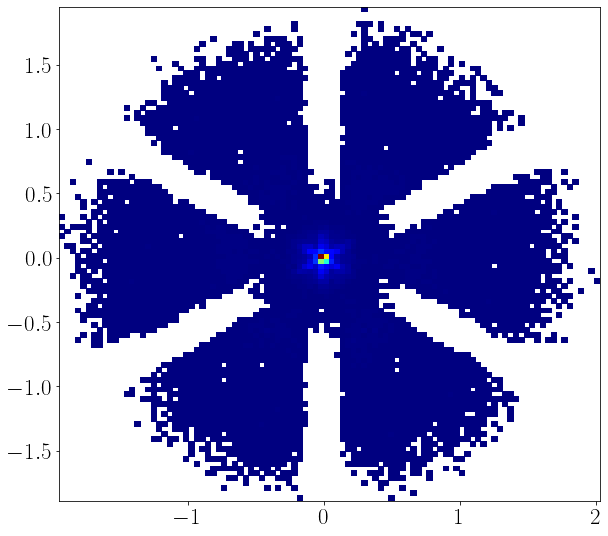

In [191]:
plt.hist2d(-a.GenEpx - a.GenPpx - a.GenGpx, -a.GenEpy - a.GenPpy - a.GenGpy, bins  = 100, cmap = cmap, cmin = 1)
plt.show()

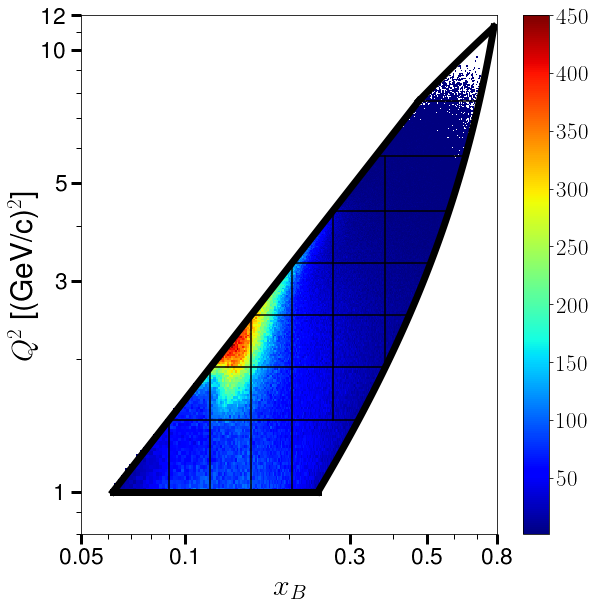

In [109]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

# pastbin = "000"
# for Q2xBtbin in goodBins:
fig, ax = plt.subplots(1,1, figsize=(9, 9))

# cmap = copy(plt.cm.get_cmap("Blues"))
# if Q2xBtbin == "000":
#     pastbin = Q2xBtbin
# elif Q2xBtbin[:-1] == pastbin[:-1]:
#     pastbin = Q2xBtbin
#     continue
# else:
#     pastbin = Q2xBtbin
h = plt.hist2d(epgExp.loc[:, "xB"], epgExp.loc[:, "Q2"], bins = 401, cmin = 1, cmap = cmap)
#h = plt.hist2d(epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "xB"], epgExp.loc[epgExp.Q2xBtbin == Q2xBtbin, "Q2"], bins = [np.linspace(0.05, 0.75, 201), np.linspace(0.8, 12, 201)], cmin = 1, cmap = cmap, norm=LogNorm())
plt.colorbar(h[3])

#CLAS12
x1 = 1/2/M/8.604
x2 = 1/(5-M**2)
x3 = (10.604/8.604-1)/M*10.604* (1-np.cos(np.radians(35)))
x4 = (1-(4-M**2)/2/10.604/M)/(1+(4-M**2)/2/10.604**2/(1-np.cos(np.radians(35))))

l1 = np.linspace(x1, x3, 101)
plt.plot(l1, l1*2*M*(10.604-2), color = 'k', linewidth = 7)
l2 = np.linspace(x1, x2, 101)
plt.plot(l2, 1+l2*0, color = 'k', linewidth = 7)
l4 = np.linspace(x3, x4, 101)
plt.plot(l4, 2*10.604*M*l4/(1+M*l4/10.604/(1-np.cos(np.radians(35)))), color = 'k', linewidth = 7)
l4 = np.linspace(x2, x4, 101)
plt.plot(l4, (4 - M*M)*l4/(1 - l4), color = 'k', linewidth = 7)

y1 = 1
y2 = 1.456
y3 = 2.510
y4 = 4.326
y5 = 7.671

c0 = y2/2/M/8.604
d0 = 1/(1+(4-M*M)/y2)
ax.plot(np.linspace(c0,c0, 101), np.linspace(y1, y2, 101), color='k')
c1 = np.sqrt(y2*y3)/2/M/8.604
d1 = 1/(1+(4-M*M)/np.sqrt(y2*y3))
ax.plot(np.linspace(c1,c1, 101), np.linspace(y1, np.sqrt(y2*y3), 101), color='k')
c2 = y3/2/M/8.604
d2 =  1/(1+(4-M*M)/y3)
ax.plot(np.linspace(c2,c2, 101), np.linspace(y1, y3, 101), color='k')
c3 = np.sqrt(y3*y4)/2/M/8.604
d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
ax.plot(np.linspace(c3,c3, 101), np.linspace(y1, np.sqrt(y3*y4), 101), color='k')
c4 = y4/2/M/8.604
d4 = 1/(1+(4-M*M)/y4)
ax.plot(np.linspace(c4,c4, 101), np.linspace(y2, y4, 101), color='k')
c5 = np.sqrt(y4*y5)/2/M/8.604
d5 = 1/(1+(4-M*M)/np.sqrt(y4*y5))
# ax.plot(np.linspace(c5,c5, 101), np.linspace(y3, np.sqrt(y4*y5), 101), color='k')
ax.plot(np.linspace(d1,d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y4*y5), 101), color='k')
c6 = y5/2/M/8.604
d6 = 1/(1+(4-M*M)/y5)

ax.plot(np.linspace(c0, d0, 101), np.linspace(y2, y2, 101), color='k')
ax.plot(np.linspace(c1, d1, 101), np.linspace(np.sqrt(y2*y3), np.sqrt(y2*y3), 101), color='k')
ax.plot(np.linspace(c2, d2, 101), np.linspace(y3, y3, 101), color='k')
ax.plot(np.linspace(c3, d3, 101), np.linspace(np.sqrt(y3*y4), np.sqrt(y3*y4), 101), color='k')
ax.plot(np.linspace(c4, d4, 101), np.linspace(y4, y4, 101), color='k')
ax.plot(np.linspace(c5, d5, 101), np.linspace(np.sqrt(y4*y5), np.sqrt(y4*y5), 101), color='k')
ax.plot(np.linspace(c6, d6, 101), np.linspace(y5, y5, 101), color='k')

ax.set_xlabel(r"$x_B$" ,fontsize = 30)
ax.set_ylabel(r"$Q^2$" +" ["+GeVc2+"]", fontsize = 30)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([0.05, 0.8])
ax.set_ylim([0.8, 12])

ax.set_xticks([0.05, 0.1, 0.3, 0.5, 0.8])
ax.set_xticklabels([0.05, 0.1, 0.3, 0.5, 0.8])

ax.set_yticks([1, 3, 5, 10, 12])
ax.set_yticklabels([1, 3, 5, 10, 12])
yminorticks = [0.8, 0.9, 2, 4, 6, 7, 8, 9, 11]
yminorticklabels = ['' for i in yminorticks]
ax.set_yticks([0.8, 0.9, 2, 4, 6, 7, 8, 9, 11], minor = True)
ax.set_yticklabels(yminorticklabels, minor = True)

ax.xaxis.set_tick_params(width=3, size =10)
ax.xaxis.set_tick_params(width=1, size = 5, which = 'minor')
ax.yaxis.set_tick_params(width=3, size = 10)
ax.yaxis.set_tick_params(width=1, size = 5, which = 'minor')

# ax.axhline(5.761)
# ax.axvline(c5)

# plt.savefig("test{}.pdf".format(Q2xBtbin))
# plt.clf()

In [5]:
    x1 = 1/2/M/8.604
    x2 = 1/(5-M**2)
    x3 = (10.604/8.604-1)/M*10.604* (1-np.cos(np.radians(35)))
    x4 = (1-(4-M**2)/2/10.604/M)/(1+(4-M**2)/2/10.604**2/(1-np.cos(np.radians(35))))


    y1 = 1
    y2 = 1.456
    y3 = 2.510
    y4 = 4.326
    y5 = 7.671

    c0 = y2/2/M/8.604
    d0 = 1/(1+(4-M*M)/y2)
    c1 = np.sqrt(y2*y3)/2/M/8.604
    d1 = 1/(1+(4-M*M)/np.sqrt(y2*y3))
    c2 = y3/2/M/8.604
    d2 =  1/(1+(4-M*M)/y3)
    c3 = np.sqrt(y3*y4)/2/M/8.604
    d3 = 1/(1+(4-M*M)/np.sqrt(y3*y4))
    c4 = y4/2/M/8.604
    d4 = 1/(1+(4-M*M)/y4)
    c5 = np.sqrt(y4*y5)/2/M/8.604
    d5 = 1/(1+(4-M*M)/np.sqrt(y4*y5))
    c6 = y5/2/M/8.604
    d6 = 1/(1+(4-M*M)/y5)


In [6]:
# Q2bins = [1, 1.456, 1.912, 2.51, 3.295, 4.326, 5.761, 7.671]
Q2bins = [y1, y2, np.sqrt(y2*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5), y5]
Q2bin_i = Q2bins[:-1]
Q2bin_f = Q2bins[1:]
xBbin_i = {0:[[x1, c0], c0, c1, c2, c3], 1: [[c0, c1], c1, c2, c3, c4], 2: [[c1, c2], c2, c3, c4, d1], 3: [[c2, c3], c3, c4, d1], 4: [[c3, c4], c4, d1], 5: [[c4, c5], d1], 6: [[c5, c6]]}
xBbin_f = {0: [c0, c1, c2, c3, [x2, d0]], 1: [c1, c2, c3, c4, [d0, d1]], 2: [c2, c3, c4, d1, [d1, d2]], 3: [c3, c4, d1, [d2, d3]], 4: [c4, d1, [d3, d4]], 5: [d1, [d4, d5]], 6: [[d5, d6]]}
tbins = [0.088, 0.177, 0.321, 0.523, 0.813, 1.187, 1.46, 1.72]
tbin_i = tbins[:-1]
tbin_f = tbins[1:]
phibin = [0, 12, 24, 36, 48, 60, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288, 300, 312, 324, 336, 348, 360]
phibin_i = phibin[:-1]
phibin_f = phibin[1:]

In [61]:
df = []
for run in [ 3987, 4124, 4139, 4181, 4182, 4186, 4188, 4192, 4397, 4240, 4250, 4251, 4252, 4255, 4263, 4262, 4266, 4398, 4238, 4249 ]:
    df.append(pd.read_pickle("/Volumes/Extreme SSD/Feb2022/nominal/results/{}.pkl".format(run)))
    df.append(pd.read_pickle("/Volumes/Extreme SSD/Feb2022/nominal/results/{}speak.pkl".format(run)))
    df.append(pd.read_pickle("/Volumes/Extreme SSD/Feb2022/nominal/results/{}ppeak.pkl".format(run)))
    df.append(pd.read_pickle("/Volumes/Extreme SSD/Feb2022/nominal/results/{}Nonrad.pkl".format(run)))

In [62]:
dvcsSim = pd.concat(df)

In [63]:
dvcsSim.loc[:, "dvcsSimInb50nA1"] = np.sum(dvcsSim.loc[:, ["39871", "41241", "41391", "41811", "41821", "43971"]] , axis = 1)
dvcsSim.loc[:, "dvcsSimInb50nA2"] = np.sum(dvcsSim.loc[:, ["39872", "41242", "41392", "41812", "41822", "43972"]] , axis = 1)
dvcsSim.loc[:, "dvcsSimInb50nA3"] = np.sum(dvcsSim.loc[:, ["39873", "41243", "41393", "41813", "41823", "43973"]] , axis = 1)

In [64]:
dvcsSim.loc[:, "dvcsSimOub50nA1"] = np.sum(dvcsSim.loc[:, ["42401", "42501", "42511", "42521", "42551", "43981"]] , axis = 1)
dvcsSim.loc[:, "dvcsSimOub50nA2"] = np.sum(dvcsSim.loc[:, ["42402", "42502", "42512", "42522", "42552", "43982"]] , axis = 1)
dvcsSim.loc[:, "dvcsSimOub50nA3"] = np.sum(dvcsSim.loc[:, ["42403", "42503", "42513", "42523", "42553", "43983"]] , axis = 1)

In [66]:
dvcsSim.loc[:, "bhSimInb50nA1"] = dvcsSim.loc[:, "42381"]
dvcsSim.loc[:, "bhSimInb50nA2"] = dvcsSim.loc[:, "42382"]
dvcsSim.loc[:, "bhSimInb50nA3"] = dvcsSim.loc[:, "42383"]
dvcsSim.loc[:, "bhSimOub50nA1"] = dvcsSim.loc[:, "42491"]
dvcsSim.loc[:, "bhSimOub50nA2"] = dvcsSim.loc[:, "42492"]
dvcsSim.loc[:, "bhSimOub50nA3"] = dvcsSim.loc[:, "42493"]

In [186]:
2*10.604*M*x3/(1+M*x3/10.604/(1-np.cos(np.radians(35))))

7.670846889438125

In [83]:
def tbinning(df):
    return [df.loc[(df.t1>tbins[i]) & (df.t1<tbins[i+1])] for i in range(len(tbins)-1)]

In [383]:
# Q2bins = [1, 1.456, 1.912, 2.51, 3.295, 4.326, 5.761, 7.671]
Q2bins = [y1, y2, np.sqrt(y2*y3), y3, np.sqrt(y3*y4), y4, np.sqrt(y4*y5), y5]
Q2bin_i = Q2bins[:-1]
Q2bin_f = Q2bins[1:]
xBbin_i = {0:[[x1, c0], c0, c1, c2, c3], 1: [[c0, c1], c1, c2, c3, c4], 2: [[c1, c2], c2, c3, c4, d1], 3: [[c2, c3], c3, c4, d1], 4: [[c3, c4], c4, d1], 5: [[c4, c5], d1], 6: [[c5, c6]]}
xBbin_f = {0: [c0, c1, c2, c3, [x2, d0]], 1: [c1, c2, c3, c4, [d0, d1]], 2: [c2, c3, c4, d1, [d1, d2]], 3: [c3, c4, d1, [d2, d3]], 4: [c4, d1, [d3, d4]], 5: [d1, [d4, d5]], 6: [[d5, d6]]}
tbins = [0.088, 0.177, 0.321, 0.523, 0.813, 1.187, 1.46, 1.72]
tbin_i = tbins[:-1]
tbin_f = tbins[1:]
phibin = [0, 12, 24, 36, 48, 60, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288, 300, 312, 324, 336, 348, 360]
phibin_i = phibin[:-1]
phibin_f = phibin[1:]

badBins = ['004', '005', '006', '015', '016', '026', '045', '046', '104', '105', '106', '115', '116', '126', '146', '205', '206', '216', '240', '245', '246', '306', '320', '330', '406', '410', '420', '500', '505', '506', '510', '600', '601']
goodBins = ['000', '001', '002', '003', '010', '011', '012', '013', '014', '020', '021', '022', '023', '024', '025', '030', '031', '032', '033', '034', '035', '036', '040', '041', '042', '043', '044', '100', '101', '102', '103', '110', '111', '112', '113', '114', '120', '121', '122', '123', '124', '125', '130', '131', '132', '133', '134', '135', '136', '140', '141', '142', '143', '144', '145', '200', '201', '202', '203', '204', '210', '211', '212', '213', '214', '215', '220', '221', '222', '223', '224', '225', '226', '230', '231', '232', '233', '234', '235', '236', '241', '242', '243', '244', '300', '301', '302', '303', '304', '305', '310', '311', '312', '313', '314', '315', '316', '321', '322', '323', '324', '325', '326', '331', '332', '333', '334', '335', '336', '400', '401', '402', '403', '404', '405', '411', '412', '413', '414', '415', '416', '421', '422', '423', '424', '425', '426', '501', '502', '503', '504', '511', '512', '513', '514', '515', '516', '602', '603', '604', '605', '606']


In [330]:
print(Q2bins)

[1, 1.456, 1.9116903514952415, 2.51, 3.295187399830243, 4.326, 5.760620279101895, 7.671]


In [368]:
epgExp0 = epgExp.loc[(epgExp.Q2>y1)&(epgExp.Q2<y2)]
epgExp0 = epgExp.loc[(epgExp.Q2>y1)&(epgExp.Q2<y2)]
epgExp00 = epgExp0.loc[(epgExp0.xB<c0)&(epgExp0.Q2<=2*M*(10.604-2)*epgExp0.xB)]
epgExp01 = epgExp0.loc[(epgExp0.xB>=c0)&(epgExp0.xB<c1)]
epgExp02 = epgExp0.loc[(epgExp0.xB>=c1)&(epgExp0.xB<c2)]
epgExp03 = epgExp0.loc[(epgExp0.xB>=c2)&(epgExp0.xB<c3)]
epgExp04 = epgExp0.loc[(epgExp0.xB>=c3)&(epgExp0.Q2>=(4 - M*M)*epgExp0.xB/(1 - epgExp0.xB))]

epgExp000, epgExp001, epgExp002, epgExp003, epgExp004, epgExp005, epgExp006 = tbinning(epgExp00)
epgExp010, epgExp011, epgExp012, epgExp013, epgExp014, epgExp015, epgExp016 = tbinning(epgExp01)
epgExp020, epgExp021, epgExp022, epgExp023, epgExp024, epgExp025, epgExp026 = tbinning(epgExp02)
epgExp030, epgExp031, epgExp032, epgExp033, epgExp034, epgExp035, epgExp036 = tbinning(epgExp03)
epgExp040, epgExp041, epgExp042, epgExp043, epgExp044, epgExp045, epgExp046 = tbinning(epgExp04)

epgExp1 = epgExp.loc[(epgExp.Q2>=y2)&(epgExp.Q2<np.sqrt(y2*y3))]
epgExp10 = epgExp1.loc[(epgExp1.xB<c1)&(epgExp1.Q2<=2*M*(10.604-2)*epgExp1.xB)]
epgExp11 = epgExp1.loc[(epgExp1.xB>=c1)&(epgExp1.xB<c2)]
epgExp12 = epgExp1.loc[(epgExp1.xB>=c2)&(epgExp1.xB<c3)]
epgExp13 = epgExp1.loc[(epgExp1.xB>=c3)&(epgExp1.xB<c4)]
epgExp14 = epgExp1.loc[(epgExp1.xB>=c4)&(epgExp1.Q2>=(4 - M*M)*epgExp1.xB/(1 - epgExp1.xB))]
epgExp100, epgExp101, epgExp102, epgExp103, epgExp104, epgExp105, epgExp106 = tbinning(epgExp10)
epgExp110, epgExp111, epgExp112, epgExp113, epgExp114, epgExp115, epgExp116 = tbinning(epgExp11)
epgExp120, epgExp121, epgExp122, epgExp123, epgExp124, epgExp125, epgExp126 = tbinning(epgExp12)
epgExp130, epgExp131, epgExp132, epgExp133, epgExp134, epgExp135, epgExp136 = tbinning(epgExp13)
epgExp140, epgExp141, epgExp142, epgExp143, epgExp144, epgExp145, epgExp146 = tbinning(epgExp14)

epgExp2 = epgExp.loc[(epgExp.Q2>=np.sqrt(y2*y3))&(epgExp.Q2<y3)]
epgExp20 = epgExp2.loc[(epgExp2.xB<c2)&(epgExp2.Q2<2*M*(10.604-2)*epgExp2.xB)]
epgExp21 = epgExp2.loc[(epgExp2.xB>=c2)&(epgExp2.xB<c3)]
epgExp22 = epgExp2.loc[(epgExp2.xB>=c3)&(epgExp2.xB<c4)]
epgExp23 = epgExp2.loc[(epgExp2.xB>=c4)&(epgExp2.xB<d1)]
epgExp24 = epgExp2.loc[(epgExp2.xB>=d1)&(epgExp2.Q2>=(4 - M*M)*epgExp2.xB/(1 - epgExp2.xB))]
epgExp200, epgExp201, epgExp202, epgExp203, epgExp204, epgExp205, epgExp206 = tbinning(epgExp20)
epgExp210, epgExp211, epgExp212, epgExp213, epgExp214, epgExp215, epgExp216 = tbinning(epgExp21)
epgExp220, epgExp221, epgExp222, epgExp223, epgExp224, epgExp225, epgExp226 = tbinning(epgExp22)
epgExp230, epgExp231, epgExp232, epgExp233, epgExp234, epgExp235, epgExp236 = tbinning(epgExp23)
epgExp240, epgExp241, epgExp242, epgExp243, epgExp244, epgExp245, epgExp246 = tbinning(epgExp24)

epgExp3 = epgExp.loc[(epgExp.Q2>=y3)&(epgExp.Q2<np.sqrt(y3*y4))]
epgExp30 = epgExp3.loc[(epgExp3.xB<c3)&(epgExp3.Q2<2*M*(10.604-2)*epgExp3.xB)]
epgExp31 = epgExp3.loc[(epgExp3.xB>=c3)&(epgExp3.xB<c4)]
epgExp32 = epgExp3.loc[(epgExp3.xB>=c4)&(epgExp3.xB<d1)]
epgExp33 = epgExp3.loc[(epgExp3.xB>=d1)&(epgExp3.Q2>=(4 - M*M)*epgExp3.xB/(1 - epgExp3.xB))]
epgExp300, epgExp301, epgExp302, epgExp303, epgExp304, epgExp305, epgExp306 = tbinning(epgExp30)
epgExp310, epgExp311, epgExp312, epgExp313, epgExp314, epgExp315, epgExp316 = tbinning(epgExp31)
epgExp320, epgExp321, epgExp322, epgExp323, epgExp324, epgExp325, epgExp326 = tbinning(epgExp32)
epgExp330, epgExp331, epgExp332, epgExp333, epgExp334, epgExp335, epgExp336 = tbinning(epgExp33)

epgExp4 = epgExp.loc[(epgExp.Q2>np.sqrt(y3*y4))&(epgExp.Q2<y4)]
epgExp40 = epgExp4.loc[(epgExp4.xB<c4)&(epgExp4.Q2<2*M*(10.604-2)*epgExp4.xB)]
epgExp41 = epgExp4.loc[(epgExp4.xB>=c4)&(epgExp4.xB<d1)]
epgExp42 = epgExp4.loc[(epgExp4.xB>=d1)&(epgExp4.Q2>=(4 - M*M)*epgExp4.xB/(1 - epgExp4.xB))]
epgExp400, epgExp401, epgExp402, epgExp403, epgExp404, epgExp405, epgExp406 = tbinning(epgExp40)
epgExp410, epgExp411, epgExp412, epgExp413, epgExp414, epgExp415, epgExp416 = tbinning(epgExp41)
epgExp420, epgExp421, epgExp422, epgExp423, epgExp424, epgExp425, epgExp426 = tbinning(epgExp42)

epgExp5 = epgExp.loc[(epgExp.Q2>y4)&(epgExp.Q2<np.sqrt(y4*y5))]
epgExp50 = epgExp5.loc[(epgExp5.xB<d1)&(epgExp5.Q2<2*M*(10.604-2)*epgExp5.xB)]
epgExp51 = epgExp5.loc[(epgExp5.xB>=d1)&(epgExp5.Q2>=(4 - M*M)*epgExp5.xB/(1 - epgExp5.xB))]
epgExp500, epgExp501, epgExp502, epgExp503, epgExp504, epgExp505, epgExp506 = tbinning(epgExp50)
epgExp510, epgExp511, epgExp512, epgExp513, epgExp514, epgExp515, epgExp516 = tbinning(epgExp51)

epgExp6 = epgExp.loc[(epgExp.Q2>np.sqrt(y4*y5))&(epgExp.Q2<y5)]
epgExp60 = epgExpInb6
epgExp600, epgExp601, epgExp602, epgExp603, epgExp604, epgExp605, epgExp606 = tbinning(epgExp60)


In [369]:
print("00", len(epgExp000), len(epgExp001), len(epgExp002), len(epgExp003), len(epgExp004), len(epgExp005), len(epgExp006))
print("01", len(epgExp010), len(epgExp011), len(epgExp012), len(epgExp013), len(epgExp014), len(epgExp015), len(epgExp016))
print("02", len(epgExp020), len(epgExp021), len(epgExp022), len(epgExp023), len(epgExp024), len(epgExp025), len(epgExp026))
print("03", len(epgExp030), len(epgExp031), len(epgExp032), len(epgExp033), len(epgExp034), len(epgExp035), len(epgExp036))
print("04", len(epgExp040), len(epgExp041), len(epgExp042), len(epgExp043), len(epgExp044), len(epgExp045), len(epgExp046))
print("10", len(epgExp100), len(epgExp101), len(epgExp102), len(epgExp103), len(epgExp104), len(epgExp105), len(epgExp106))
print("11", len(epgExp110), len(epgExp111), len(epgExp112), len(epgExp113), len(epgExp114), len(epgExp115), len(epgExp116))
print("12", len(epgExp120), len(epgExp121), len(epgExp122), len(epgExp123), len(epgExp124), len(epgExp125), len(epgExp126))
print("13", len(epgExp130), len(epgExp131), len(epgExp132), len(epgExp133), len(epgExp134), len(epgExp135), len(epgExp136))
print("14", len(epgExp140), len(epgExp141), len(epgExp142), len(epgExp143), len(epgExp144), len(epgExp145), len(epgExp146))
print("20", len(epgExp200), len(epgExp201), len(epgExp202), len(epgExp203), len(epgExp204), len(epgExp205), len(epgExp206))
print("21", len(epgExp210), len(epgExp211), len(epgExp212), len(epgExp213), len(epgExp214), len(epgExp215), len(epgExp216))
print("22", len(epgExp220), len(epgExp221), len(epgExp222), len(epgExp223), len(epgExp224), len(epgExp225), len(epgExp226))
print("23", len(epgExp230), len(epgExp231), len(epgExp232), len(epgExp233), len(epgExp234), len(epgExp235), len(epgExp236))
print("24", len(epgExp240), len(epgExp241), len(epgExp242), len(epgExp243), len(epgExp244), len(epgExp245), len(epgExp246))
print("30", len(epgExp300), len(epgExp301), len(epgExp302), len(epgExp303), len(epgExp304), len(epgExp305), len(epgExp306))
print("31", len(epgExp310), len(epgExp311), len(epgExp312), len(epgExp313), len(epgExp314), len(epgExp315), len(epgExp316))
print("32", len(epgExp320), len(epgExp321), len(epgExp322), len(epgExp323), len(epgExp324), len(epgExp325), len(epgExp326))
print("33", len(epgExp330), len(epgExp331), len(epgExp332), len(epgExp333), len(epgExp334), len(epgExp335), len(epgExp336))
print("40", len(epgExp400), len(epgExp401), len(epgExp402), len(epgExp403), len(epgExp404), len(epgExp405), len(epgExp406))
print("41", len(epgExp410), len(epgExp411), len(epgExp412), len(epgExp413), len(epgExp414), len(epgExp415), len(epgExp416))
print("42", len(epgExp420), len(epgExp421), len(epgExp422), len(epgExp423), len(epgExp424), len(epgExp425), len(epgExp426))
print("50", len(epgExp500), len(epgExp501), len(epgExp502), len(epgExp503), len(epgExp504), len(epgExp505), len(epgExp506))
print("51", len(epgExp510), len(epgExp511), len(epgExp512), len(epgExp513), len(epgExp514), len(epgExp515), len(epgExp516))
print("60", len(epgExp600), len(epgExp601), len(epgExp602), len(epgExp603), len(epgExp604), len(epgExp605), len(epgExp606))

00 914 2806 2048 1045 0 0 0
01 6227 9129 4970 2479 914 0 0
02 5828 12386 12804 4757 1897 705 0
03 5700 9015 11463 12262 3965 1226 603
04 4535 9742 9227 9397 4027 0 0
10 5914 6392 2887 1247 0 0 0
11 22052 34372 15760 4038 1238 0 0
12 7757 12893 15168 10625 2935 710 0
13 3972 10041 7257 7792 5227 1441 655
14 832 5748 7004 5813 3402 942 0
20 38312 45272 15631 4573 983 0 0
21 18578 45446 34004 14941 4056 701 0
22 5467 14650 10402 9673 5981 1681 871
23 835 9115 11466 9185 5938 2339 1128
24 0 660 2402 2244 1031 0 0
30 18147 40887 21328 7782 2664 602 0
31 5263 20987 19888 13220 5475 1478 766
32 0 9608 12056 8719 5890 2518 1350
33 0 1007 5367 6254 3772 1180 662
40 2881 17791 16697 7821 2465 640 0
41 0 7362 11796 9132 5317 1751 1024
42 0 872 5306 7138 4975 1846 1092
50 0 1980 4514 3412 1766 0 0
51 0 737 4355 6121 4729 1910 1161
60 0 74 621 1206 1044 487 303


In [380]:
len(epgExp.loc[epgExp.Q2xBtbin == "511", "xB"])

737

In [381]:
epgExp

,Epx,Epy,Epz,Eedep,Esector,Evx,Evy,EventNum,RunNum,beamQ,...,tmin1,tmin2,tcol,config,xBbin,Q2bin,tbin,phibin,Q2xBtbin,Q2xBtphi
0,0.544030,-0.670432,2.220629,0.528008,6,1.442337,1.145010,394729,5422,9542.079102,...,0.054545,0.052283,0.932642,3,0,4,1,2,401,2312
7,0.577139,-0.669939,3.753812,0.961353,6,0.308721,0.230563,14183,5032,264.465240,...,0.030684,0.029051,0.889910,3,1,2,1,18,211,1299
11,0.146267,0.701494,2.166533,0.596770,2,1.266272,-0.320975,27321,5032,318.975433,...,0.025170,0.024047,0.600714,3,1,2,1,17,211,1298
14,0.184696,0.729803,3.458163,0.822600,2,0.095727,-0.074260,41492,5032,375.065918,...,0.016671,0.015774,0.627445,3,1,1,0,3,110,654
20,0.659025,-0.884050,7.653812,1.612236,6,-0.185032,-0.169076,56526,5032,437.780762,...,0.110160,0.099927,1.334494,2,4,1,1,5,141,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12497778,-0.719268,0.677477,5.707164,1.431916,3,-1.233018,-1.382145,110558311,5666,288167.531250,...,0.041909,0.038979,1.081384,2,2,1,2,17,122,815
12497826,-0.947278,1.010672,6.796872,1.664790,3,-0.600893,-0.640366,110613863,5666,288322.312500,...,0.249416,0.234022,2.277446,2,3,3,2,6,332,2190
12497855,0.947052,0.314195,6.033103,1.588785,1,-0.166327,0.570670,110647354,5666,288416.250000,...,0.045051,0.041731,1.098275,3,3,1,3,20,133,965
12497915,-0.502496,-0.851831,6.648096,1.588211,5,-0.747648,0.441723,110700539,5666,288559.093750,...,0.047954,0.043974,1.066642,3,3,1,4,1,134,967


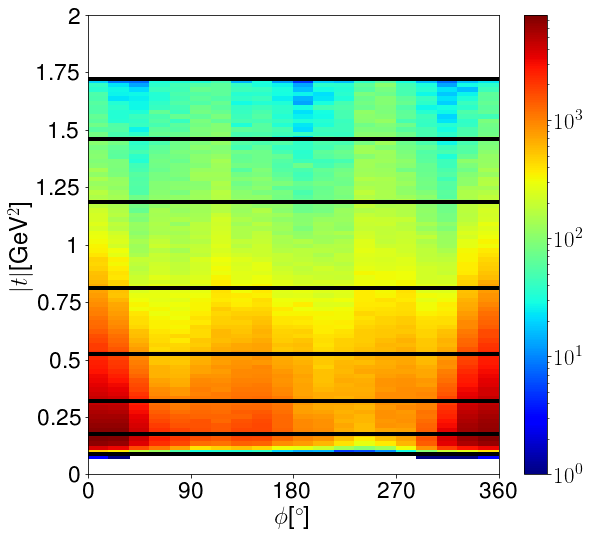

In [108]:
plt.rcParams["figure.figsize"] = (9, 8)
h = plt.hist2d(epgExp.phi1, (epgExp.t1), bins = [np.linspace(0, 360, 21), np.linspace(0.05, 2, 101)], cmin = 1, cmap = cmap, norm = LogNorm())
plt.colorbar(h[3])
# plt.ylabel(r"$|t|~~ ($"+GeV2+r"$)$")
# plt.xlabel(r"$\phi$" +" ["+degree+"]")
tbins = [0.088, 0.177, 0.321, 0.523, 0.813, 1.187, 1.46, 1.72]
for tbin in tbins:
    plt.axhline(tbin, color = 'k', linewidth= 4)
plt.xticks([0, 90, 180, 270, 360], [0, 90, 180, 270, 360])
plt.yticks([0, 0.25, 0.5,0.75, 1, 1.25, 1.5, 1.75, 2], [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
plt.xlabel(r"$\phi$" + "[" + degree + "]")
plt.ylabel(r"$|t|$" + "[" + GeV2 + "]")
plt.show()

In [334]:
df_global = pd.DataFrame()
total = epgExp
badBins = []
goodBins = []
for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
    for xBbin in range(0, len(xBbin_i[Q2bin])):
        for tbin in range(0, len(tbin_i)):
            local = total
            Q2_i = Q2bin_i[Q2bin]
            Q2_f = Q2bin_f[Q2bin]
            xB_i = xBbin_i[Q2bin][xBbin]
            xB_f = xBbin_f[Q2bin][xBbin]
            t_i = tbin_i[tbin]
            t_f = tbin_f[tbin]
            #cut by Q2
            local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
            #cut by xB
            #xB lower bound
            if xBbin == 0:
                local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
            else:
                local = local.loc[local.xB>=xB_i] 
            #xB upper bound
            if (xBbin == len(xBbin_i[Q2bin])-1):
                local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
            else:
                local = local.loc[local.xB<xB_f]
            #cut by t
            local = local.loc[(local.t1>=t_i) & (local.t1<t_f)]
            Q2xBtbin = "{}{}{}".format(Q2bin,xBbin,tbin)
            
            if len(local)<600:
                badBins.append(Q2xBtbin)
                continue
            else:
                goodBins.append(Q2xBtbin)
#             if Q2xBtbin in badBins:
#                 continue

            df_local = pd.DataFrame()
            df_local.loc[:, "phi_i"] = phibin_i
            df_local.loc[:, "phi_f"] = phibin_f
            df_local.loc[:, "phi"] = df_local.index
            if type(xB_i) is list:
                df_local.loc[:, "xB_i"] = xB_i[0]
            else:
                df_local.loc[:, "xB_i"] = xB_i
            if type(xB_f) is list:
                df_local.loc[:, "xB_f"] = xB_f[1]
            else:
                df_local.loc[:, "xB_f"] = xB_f
            df_local.loc[:, "xB"] = xBbin
            df_local.loc[:, "Q2_i"] = Q2_i
            df_local.loc[:, "Q2_f"] = Q2_f
            df_local.loc[:, "Q2"] = Q2bin
            df_local.loc[:, "t_i"] = t_i
            df_local.loc[:, "t_f"] = t_f            
            df_local.loc[:, "t"] = tbin
            df_local.loc[:, "Q2xBt"] = Q2xBtbin
            if xBbin == 0:
                if Q2bin == len(Q2bin_i)-1:
                    binVol = integrate.quad(lambda y: (1/(1+(4-M*M)/y) - y/2/M/8.604), Q2_i, Q2_f)[0]*(t_f-t_i)
                else:
                    binVol = (xB_f-(xB_i[1]+xB_i[0])/2)*(Q2_f-Q2_i)*(t_f-t_i)
            elif (xBbin == len(xBbin_i[Q2bin])-1):
                binVol = integrate.quad(lambda y: (1/(1+(4-M*M)/y) - xB_i), Q2_i, Q2_f)[0]*(t_f-t_i)
            else:
                binVol = (xB_f-xB_i)*(Q2_f-Q2_i)*(t_f-t_i)
            df_local.loc[:, "binVol"] = binVol
            df_local.binVol= df_local.binVol * np.radians((df_local.phi_f - df_local.phi_i))
            df_global = pd.concat([df_global, df_local])
                
df_global.index = np.linspace(0, len(df_global)-1, len(df_global)).astype(int)
df_global.loc[:, "Q2xBtphi"] = df_global.index

In [382]:
print(badBins)
print(goodBins)

['004', '005', '006', '015', '016', '026', '045', '046', '104', '105', '106', '115', '116', '126', '146', '205', '206', '216', '240', '245', '246', '306', '320', '330', '406', '410', '420', '500', '505', '506', '510', '600', '601']
['000', '001', '002', '003', '010', '011', '012', '013', '014', '020', '021', '022', '023', '024', '025', '030', '031', '032', '033', '034', '035', '036', '040', '041', '042', '043', '044', '100', '101', '102', '103', '110', '111', '112', '113', '114', '120', '121', '122', '123', '124', '125', '130', '131', '132', '133', '134', '135', '136', '140', '141', '142', '143', '144', '145', '200', '201', '202', '203', '204', '210', '211', '212', '213', '214', '215', '220', '221', '222', '223', '224', '225', '226', '230', '231', '232', '233', '234', '235', '236', '241', '242', '243', '244', '300', '301', '302', '303', '304', '305', '310', '311', '312', '313', '314', '315', '316', '321', '322', '323', '324', '325', '326', '331', '332', '333', '334', '335', '336', '400

In [384]:
def numberingDF(total, Q2bin_i=Q2bin_i, Q2bin_f=Q2bin_f, xBbin_i=xBbin_i, xBbin_f=xBbin_f, tbin_i=tbin_i, tbin_f=tbin_f, goodBins=goodBins, badBins=badBins, df_global=df_global):
    df_allBins = {}
    Q2xBtphi = 0

    for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
        for xBbin in range(0, len(xBbin_i[Q2bin])):
            for tbin in range(0, len(tbin_i)):
                local = total
                Q2_i = Q2bin_i[Q2bin]
                Q2_f = Q2bin_f[Q2bin]
                xB_i = xBbin_i[Q2bin][xBbin]
                xB_f = xBbin_f[Q2bin][xBbin]
                t_i = tbin_i[tbin]
                t_f = tbin_f[tbin]
                #cut by Q2
                local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
                #cut by xB
                #xB lower bound
                if xBbin == 0:
                    local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
                else:
                    local = local.loc[local.xB>=xB_i] 
                #xB upper bound
                if (xBbin == len(xBbin_i[Q2bin])-1):
                    local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
                else:
                    local = local.loc[local.xB<xB_f]
                #cut by t
                local = local.loc[(local.t1>=t_i) & (local.t1<t_f)]
                Q2xBtbin = "{}{}{}".format(Q2bin,xBbin,tbin)

                if Q2xBtbin in badBins:
                    continue
                    
                for phi_ind in range(0, len(phibin_i)):
                    local.loc[:, "xBbin"] = xBbin
                    local.loc[:, "Q2bin"] = Q2bin
                    local.loc[:, "tbin"] = tbin
                    local.loc[:, "phibin"] = phi_ind
                    local.loc[:, "Q2xBtbin"] = Q2xBtbin
                    local.loc[:, "Q2xBtphi"] = Q2xBtphi
                    df_allBins[Q2xBtphi] = local.loc[(local.phi1>=phibin_i[phi_ind])&(local.phi1<phibin_f[phi_ind])]
                    Q2xBtphi += 1

    total = pd.concat(df_allBins.values()).sort_values( by = 'event')
    return total

In [385]:
epgExp = numberingDF(epgExp)

In [386]:
epgExpInb = numberingDF(epgExpInb)

In [387]:
epgExpOutb = numberingDF(epgExpOutb)

In [388]:
def countDF(total, df_global, colName = "new"):
    numbers1 = []
    numbers2 = []
    numbers3 = []
    if 'Q2xBtphi' not in total:
        total = numberingDF(total, Q2bin_i, Q2bin_f, xBbin_i, xBbin_f, tbin_i, tbin_f, goodBins, badBins, df_global)
    for i in range(len(df_global)):
        if i%50 == 0:
            print(i)
        number1 = sum((total.Q2xBtphi == i) & (total.config == 1))
        number2 = sum((total.Q2xBtphi == i) & (total.config == 2))
        number3 = sum((total.Q2xBtphi == i) & (total.config == 3))
        numbers1.append(number1)
        numbers2.append(number2)
        numbers3.append(number3)
    df_global.loc[:, colName+"1"] = numbers1
    df_global.loc[:, colName+"2"] = numbers2
    df_global.loc[:, colName+"3"] = numbers3
    return df_global

In [389]:
df_global = countDF(epgExpInb, df_global, "epgExpInb")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950


In [390]:
df_global = countDF(epgExpOutb, df_global, "epgExpOutb")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950


In [323]:
sum(df_global.epgExpInb1) + sum(df_global.epgExpInb2) + sum(df_global.epgExpInb3)

378958

In [324]:
sum(df_global.epgExpOutb1) + sum(df_global.epgExpOutb2) + sum(df_global.epgExpOutb3)

656107

In [68]:
len(phibin)

22

In [391]:
df_global.to_pickle("~/df_globalFeb.pkl")

<AxesSubplot:>

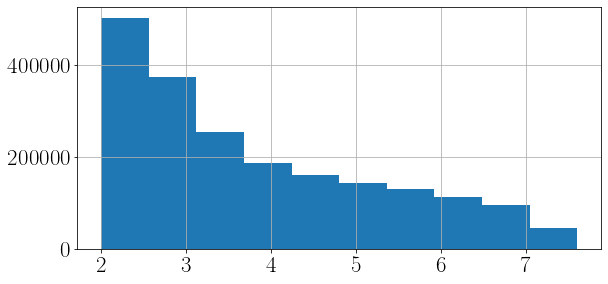

In [285]:
dvcsSimInb.loc[dvcsSimInb.radMode==1].Ep.hist()

In [334]:
def TruebinVol(Q2bin, xBbin, tbin, phibin, df, N1=10, N2=10, N3=10, N4=10):
    
    count = 0 
    
    Q2_i = Q2bin_i[Q2bin]
    Q2_f = Q2bin_f[Q2bin]
    xB_i = xBbin_i[Q2bin][xBbin]
    xB_f = xBbin_f[Q2bin][xBbin]
    t_i = tbin_i[tbin]
    t_f = tbin_f[tbin]
    phi_i = phibin_i[phibin]
    phi_f = phibin_f[phibin]
    
    local = df
    #cut by Q2
    if Q2bin == len(Q2bin_i)-1:
        local = local.loc[(local.Q2>=Q2_i) & (local.Q2<=Q2_f)]
    else:
        local = local.loc[(local.Q2>=Q2_i) & (local.Q2<Q2_f)]
    #cut by xB
    #xB lower bound
    if xBbin == 0:
        local = local.loc[local.Q2<=2*M*(10.604-2)*local.xB, :]
    else:
        local = local.loc[local.xB>=xB_i] 
    #xB upper bound
    if (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
        local = local.loc[local.Q2>=2*M*3*local.xB]
    elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
        local = local.loc[local.Q2>=(4 - M*M)*local.xB/(1 - local.xB)]
    else:
        local = local.loc[local.xB<xB_f]
    #cut by t
    if tbin == len(tbin_i)-1:
        local = local.loc[(local.t1>=t_i) & (local.t1<=t_f)]
    else:
        local = local.loc[(local.t1>=t_i) & (local.t1<t_f)]
                
    if isinstance(xB_i, list):
        xB_i = min(xB_i)
    if isinstance(xB_f, list):
        xB_f = max(xB_f)
    for q2ind in range(N1):
        for xind in range(N2):
            for tind in range(N3):
                for phiind in range(N4):
                    qmin = Q2_i + (Q2_f - Q2_i)*q2ind/N1
                    qmax = Q2_i + (Q2_f - Q2_i)*(q2ind+1)/N1
                    xmin = xB_i + (xB_f - xB_i)*xind/N2
                    xmax = xB_i + (xB_f - xB_i)*(xind+1)/N2
                    tmin = t_i + (t_f - t_i)*tind/N3
                    tmax = t_i + (t_f - t_i)*(tind+1)/N3
                    pmin = phi_i + (phi_f - phi_i)*phiind/N4
                    pmax = phi_i + (phi_f - phi_i)*(phiind+1)/N4
                    local2 = local.loc[(local.Q2>=qmin) & (local.Q2<qmax)]
                    local2 = local2.loc[(local2.xB>=xmin) & (local2.xB<xmax)]
                    local2 = local2.loc[(local2.t1>=tmin) & (local2.t1<tmax)]
                    local2 = local2.loc[(local2.phi1>=pmin) & (local2.phi1<pmax)]
                    if(len(local2)):
                        count += 1
    return count/N1/N2/N3/N4*(Q2_f - Q2_i)*(xB_f - xB_i)*(t_f - t_i)*np.radians(phi_f - phi_i)

In [342]:
TruebinVol(5, 0, 2, 14, dvcsSimInb, 6, 6, 6, 6)

0.008040901710292765

In [439]:
local502 = pd.read_pickle("local502_outb.pkl")

In [534]:
truebinvol = pd.read_pickle("truebinVol_outb.pkl")

In [535]:
truebinvol.loc[:, ["binVol", "binVolInb", "binVolOutb"]]

,binVol,binVolInb,binVolOutb
1281,0.004299,0.004180,0.003257
1282,0.004299,0.004067,0.003032
1283,0.004299,0.004100,0.002932
1284,0.004299,0.004279,0.002866
1285,0.004299,0.004425,0.002919
1286,0.004299,0.004704,0.002853
1287,0.008598,0.009355,0.005533
1288,0.008598,0.008771,0.004405
1289,0.008598,0.008067,0.002601
1290,0.008598,0.007829,0.001579


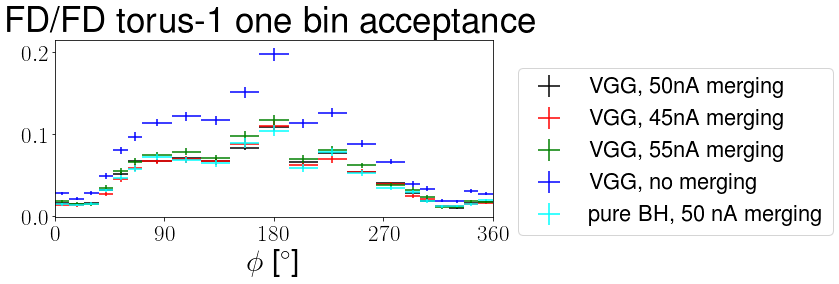

In [481]:
plt.errorbar(phibincenters, local502.dvcsSimInb50nA1/ local502.dvcsGenInb50nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb50nA1/local502.dvcsGenInb50nA*np.sqrt(1/local502.dvcsSimInb50nA1 + 1/local502.dvcsGenInb50nA), color = 'k', label = "VGG, 50nA merging")
plt.errorbar(phibincenters, local502.dvcsSimInb55nA1/ local502.dvcsGenInb55nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb55nA1/local502.dvcsGenInb55nA*np.sqrt(1/local502.dvcsSimInb55nA1 + 1/local502.dvcsGenInb55nA), color = 'r', label = "VGG, 45nA merging")
plt.errorbar(phibincenters, local502.dvcsSimInb45nA1/ local502.dvcsGenInb45nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb45nA1/local502.dvcsGenInb45nA*np.sqrt(1/local502.dvcsSimInb45nA1 + 1/local502.dvcsGenInb45nA), color = 'g', label = "VGG, 55nA merging")
plt.errorbar(phibincenters, local502.dvcsSimInb0nA1/ local502.dvcsGenInb0nA, linestyle ='', xerr = phibinwidths, yerr = local502.dvcsSimInb0nA1/local502.dvcsGenInb0nA*np.sqrt(1/local502.dvcsSimInb0nA1 + 1/local502.dvcsGenInb0nA), color = 'b', label = "VGG, no merging")
plt.errorbar(phibincenters, local502.bhSimInb50nA1/ local502.bhGenInb50nA, linestyle ='', xerr = phibinwidths, yerr = local502.bhSimInb50nA1/local502.bhGenInb50nA*np.sqrt(1/local502.bhSimInb50nA1 + 1/local502.bhGenInb50nA), color = 'cyan', label = 'pure BH, 50 nA merging')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.8, 0.9))
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+" ["+degree+"]")
plt.tight_layout()
plt.title("FD/FD torus-1 one bin acceptance")
plt.show()

In [451]:
local502.dvcsSimInb45nA1/ local502.dvcsGenInb45nA

1281    0.018646
1282    0.015753
1283    0.014860
1284    0.035207
1285    0.055774
1286    0.066805
1287    0.074593
1288    0.079087
1289    0.071122
1290    0.098473
1291    0.117415
1292    0.070148
1293    0.080803
1294    0.062125
1295    0.038153
1296    0.032344
1297    0.024271
1298    0.011120
1299    0.011626
1300    0.018551
1301    0.018136
dtype: float64

In [452]:
local502.dvcsSimInb0nA1/ local502.dvcsGenInb0nA

1281    0.028332
1282    0.021645
1283    0.028783
1284    0.049174
1285    0.080660
1286    0.097156
1287    0.114378
1288    0.122035
1289    0.117470
1290    0.151591
1291    0.197771
1292    0.113722
1293    0.126469
1294    0.088828
1295    0.066890
1296    0.039840
1297    0.034049
1298    0.019211
1299    0.018759
1300    0.031167
1301    0.027601
dtype: float64

In [453]:
local502.dvcsSimInb55nA1/ local502.dvcsGenInb55nA

1281    0.013881
1282    0.013547
1283    0.015065
1284    0.027717
1285    0.045047
1286    0.059489
1287    0.067037
1288    0.069513
1289    0.067109
1290    0.088797
1291    0.110117
1292    0.062232
1293    0.069691
1294    0.054672
1295    0.039922
1296    0.025300
1297    0.020765
1298    0.012279
1299    0.012165
1300    0.015089
1301    0.016531
dtype: float64

In [454]:
local502.bhSimInb50nA1/ local502.bhGenInb50nA

1281    0.014636
1282    0.014141
1283    0.015586
1284    0.031716
1285    0.047210
1286    0.058335
1287    0.072188
1288    0.068704
1289    0.064920
1290    0.089360
1291    0.104456
1292    0.059208
1293    0.078139
1294    0.053330
1295    0.035158
1296    0.030060
1297    0.018810
1298    0.012168
1299    0.012483
1300    0.014683
1301    0.019932
dtype: float64

In [407]:
invaccInbFD = local502.dvcsGenInb50nA/local502.dvcsSimInb50nA1
invaccInbFDunc = invaccInbFD * np.sqrt(1/local502.dvcsSimInb50nA1 + 1/local502.dvcsGenInb50nA)
invaccInbFD.loc[local502.dvcsSimInb50nA1<100] = 0
invaccInbFDunc.loc[local502.dvcsSimInb50nA1<100] = 0


invaccInbCD = local502.dvcsGenInb50nA/local502.dvcsSimInb50nA2
invaccInbCDunc = invaccInbCD * np.sqrt(1/local502.dvcsSimInb50nA2 + 1/local502.dvcsGenInb50nA)
invaccInbCD.loc[local502.dvcsSimInb50nA2<100] = 0
invaccInbCDunc.loc[local502.dvcsSimInb50nA2<100] = 0


invaccInbCDFT = local502.dvcsGenInb50nA/local502.dvcsSimInb50nA3
invaccInbCDFTunc = invaccInbCDFT * np.sqrt(1/local502.dvcsSimInb50nA3 + 1/local502.dvcsGenInb50nA)
invaccInbCDFT.loc[local502.dvcsSimInb50nA3<100] = 0
invaccInbCDFTunc.loc[local502.dvcsSimInb50nA3<100] = 0

In [496]:
invaccOutbFD = local502.dvcsGenOutb50nA/local502.dvcsSimOutb50nA1
invaccOutbFDunc = invaccOutbFD * np.sqrt(1/local502.dvcsSimOutb50nA1 + 1/local502.dvcsGenOutb50nA)
invaccOutbFD.loc[local502.dvcsSimOutb50nA1<200] = 0
invaccOutbFDunc.loc[local502.dvcsSimOutb50nA1<200] = 0


invaccOutbCD = local502.dvcsGenOutb50nA/local502.dvcsSimOutb50nA2
invaccOutbCDunc = invaccOutbCD * np.sqrt(1/local502.dvcsSimOutb50nA2 + 1/local502.dvcsGenOutb50nA)
invaccOutbCD.loc[local502.dvcsSimOutb50nA2<200] = 0
invaccOutbCDunc.loc[local502.dvcsSimOutb50nA2<200] = 0


invaccOutbCDFT = local502.dvcsGenOutb50nA/local502.dvcsSimOutb50nA3
invaccOutbCDFTunc = invaccOutbCDFT * np.sqrt(1/local502.dvcsSimOutb50nA3 + 1/local502.dvcsGenOutb50nA)
invaccOutbCDFT.loc[local502.dvcsSimOutb50nA3<200] = 0
invaccOutbCDFTunc.loc[local502.dvcsSimOutb50nA3<200] = 0

In [519]:
local502.epgExpInb1

1281     56
1282     41
1283     39
1284     56
1285     87
1286     95
1287    127
1288    128
1289    111
1290    118
1291    156
1292     78
1293    115
1294     92
1295    100
1296     38
1297     33
1298     13
1299     19
1300     36
1301     47
Name: epgExpInb1, dtype: int64

In [648]:
def makezero(series):
    series.loc[np.isnan(series)] = 0
    return series

In [650]:
makezero(contInbCDFTunc/contInbCDFT)

1281    0.284859
1282    0.244473
1283    0.370930
1284    0.000000
1285    0.000000
1286    0.000000
1287    0.000000
1288    0.000000
1289    0.000000
1290    0.000000
1291    0.000000
1292    0.000000
1293    0.000000
1294    0.000000
1295    0.000000
1296    0.000000
1297    0.000000
1298    0.000000
1299    0.448920
1300    0.367181
1301    0.172152
dtype: float64

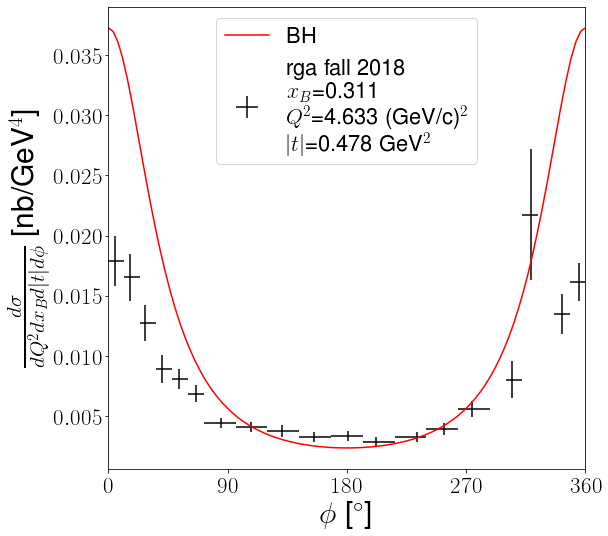

In [657]:
plt.rcParams["figure.figsize"] = (9, 8)
plt.rcParams["axes.titlesize"] = 35
plt.rcParams["axes.labelsize"] = 30

Fradunc = ((1-fsInb1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1-fpInb1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/(truebinvol.dvcsSimInb50nA_non1 +(1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/2

xsecInbFD = invaccInbFD * (local502.epgExpInb1 - contInbFD)/truebinvol.binVolInb/56.5/10**6/Frad
xsecInbFDunc = xsecInbFD*np.sqrt(1/local502.dvcsSimInb50nA1 + 1/local502.dvcsGenInb50nA  + 1/(local502.epgExpInb1)+(contInbFDunc/contInbFD)**2 + Fradunc**2) 
xsecInbFD.loc[local502.epgExpInb1<20] = 0
xsecInbFDunc.loc[local502.epgExpInb1<20] = 0

xsecInbCD = invaccInbCD * (local502.epgExpInb2 - contInbCD)/truebinvol.binVolInb/56.5/10**6/Frad
xsecInbCDunc = xsecInbCD*np.sqrt(1/local502.dvcsSimInb50nA2 + 1/local502.dvcsGenInb50nA  + 1/(local502.epgExpInb2)+(contInbCDunc/contInbCD)**2 + Fradunc**2)
xsecInbCD.loc[local502.epgExpInb2<20] = 0
xsecInbCDunc.loc[local502.epgExpInb2<20] = 0

xsecInbCDFT = invaccInbCDFT * (local502.epgExpInb3 - contInbCDFT)/truebinvol.binVolInb/56.5/10**6/Frad
xsecInbCDFTunc = xsecInbCDFT*np.sqrt(1/local502.dvcsSimInb50nA3 + 1/local502.dvcsGenInb50nA  + 1/(local502.epgExpInb3)+(contInbCDFTunc/contInbCDFT)**2 + Fradunc**2)
xsecInbCDFT.loc[local502.epgExpInb3<20] = 0
xsecInbCDFTunc.loc[local502.epgExpInb3<20] = 0

xsecOutbFD = invaccOutbFD * (local502.epgExpOutb1 - contOutbFD)/truebinvol.binVolOutb/56.5/10**6/Frad
xsecOutbFDunc = xsecOutbFD*np.sqrt(1/local502.dvcsSimOutb50nA1 + 1/local502.dvcsGenOutb50nA  + 1/(local502.epgExpOutb1)+(contOutbFDunc/contOutbFD)**2 + Fradunc**2)
xsecOutbFD.loc[local502.epgExpOutb1<20] = 0
xsecOutbFDunc.loc[local502.epgExpOutb1<20] = 0

xsecOutbCD = invaccOutbCD * (local502.epgExpOutb2 - contOutbCD)/truebinvol.binVolOutb/56.5/10**6/Frad
xsecOutbCDunc = xsecOutbCD*np.sqrt(1/local502.dvcsSimOutb50nA2 + 1/local502.dvcsGenOutb50nA  + 1/(local502.epgExpOutb2)+(contOutbCDunc/contOutbCD)**2 + Fradunc**2)
xsecOutbCD.loc[local502.epgExpOutb2<20] = 0
xsecOutbCDunc.loc[local502.epgExpOutb2<20] = 0

xsecOutbCDFT = invaccOutbCDFT * (local502.epgExpOutb3 - contOutbCDFT)/truebinvol.binVolOutb/56.5/10**6/Frad
xsecOutbCDFTunc = xsecOutbCDFT*np.sqrt(1/local502.dvcsSimOutb50nA3 + 1/local502.dvcsGenOutb50nA  + 1/(local502.epgExpOutb3)+(contOutbCDFTunc/contOutbCDFT)**2 + Fradunc**2)
xsecOutbCDFT.loc[local502.epgExpOutb3<20] = 0
xsecOutbCDFTunc.loc[local502.epgExpOutb3<20] = 0

# plt.errorbar(phibincenters, xsecInbFD, linestyle = '', xerr = phibinwidths, yerr = xsecInbFDunc)
# plt.errorbar(phibincenters, xsecInbCD, linestyle = '', xerr = phibinwidths, yerr = xsecInbCDunc)
# plt.errorbar(phibincenters, xsecInbCDFT, linestyle = '', xerr = phibinwidths, yerr = xsecInbCDFTunc)

# plt.errorbar(phibincenters, xsecOutbFD, linestyle = '', xerr = phibinwidths, yerr = xsecOutbFDunc)
# plt.errorbar(phibincenters, xsecOutbCD, linestyle = '', xerr = phibinwidths, yerr = xsecOutbCDunc)
# plt.errorbar(phibincenters, xsecOutbCDFT, linestyle = '', xerr = phibinwidths, yerr = xsecOutbCDFTunc)

xsecInbFDunc.loc[local502.epgExpInb1<20] = np.inf
xsecInbCDunc.loc[local502.epgExpInb2<20] = np.inf
xsecInbCDFTunc.loc[local502.epgExpInb3<20] = np.inf

xsecOutbFDunc.loc[local502.epgExpOutb1<20] = np.inf
xsecOutbCDunc.loc[local502.epgExpOutb2<20] = np.inf
xsecOutbCDFTunc.loc[local502.epgExpOutb3<20] = np.inf

avg = (xsecInbFD/xsecInbFDunc**2 + xsecInbCD/xsecInbCDunc**2 + xsecInbCDFT/xsecInbCDFTunc**2 + xsecOutbFD/xsecOutbFDunc**2 + xsecOutbCD/xsecOutbCDunc**2 + xsecOutbCDFT/xsecOutbCDFTunc**2)/(1/xsecInbFDunc**2+1/xsecInbCDunc**2+1/xsecInbCDFTunc**2+1/xsecOutbFDunc**2+1/xsecOutbCDunc**2+1/xsecOutbCDFTunc**2)

plt.errorbar(np.degrees(phiarray502), avg, xerr = [np.degrees(phiarray502) - np.array(phibin_i), np.array(phibin_f) - np.degrees(phiarray502) ], yerr = np.sqrt(1/(1/xsecInbFDunc**2+1/xsecInbCDunc**2+1/xsecInbCDFTunc**2+1/xsecOutbFDunc**2+1/xsecOutbCDunc**2+1/xsecOutbCDFTunc**2)), linestyle = '', color = 'k', label = 'rga fall 2018\n '+r'$x_B$'+'={:0.3f}\n'.format(xBmean)+r'$Q^2$'+'={:0.3f} '.format(Q2mean)+GeVc2+"\n"+r'$|t|$'+'={:0.3f} '.format(tmean)+GeV2)

plt.plot(np.degrees(phiarray), dsarray, color = 'r', label = 'BH')
plt.xlim([0, 360])
plt.xticks([0, 90, 180, 270, 360])
plt.xlabel(r"$\phi$"+" ["+degree+"]")
plt.ylabel(r"$\frac{d\sigma}{dQ^2 dx_B d|t| d\phi}$" + " [nb/GeV"+r"${}^{4}$"+"]")
plt.legend(loc = 'best')
plt.show()

In [560]:
truebinvol.binVolOutb/truebinvol.binVol

1281    0.757716
1282    0.705247
1283    0.682099
1284    0.666667
1285    0.679012
1286    0.663580
1287    0.643519
1288    0.512346
1289    0.302469
1290    0.183642
1291    0.179012
1292    0.217593
1293    0.324074
1294    0.507716
1295    0.577160
1296    0.436728
1297    0.453704
1298    0.464506
1299    0.572531
1300    0.671296
1301    0.731481
dtype: float64

In [553]:
fsInb1 = (truebinvol.dvcsSimInb50nA_sPeak1/truebinvol.dvcsGenInb50nA_sPeak)/(truebinvol.dvcsSimInb50nA_non1/truebinvol.dvcsGenInb50nA_non)

In [554]:
fpInb1 = (truebinvol.dvcsSimInb50nA_pPeak1/truebinvol.dvcsGenInb50nA_pPeak)/(truebinvol.dvcsSimInb50nA_non1/truebinvol.dvcsGenInb50nA_non)

Text(0, 0.5, '$\\sigma_{rad}$')

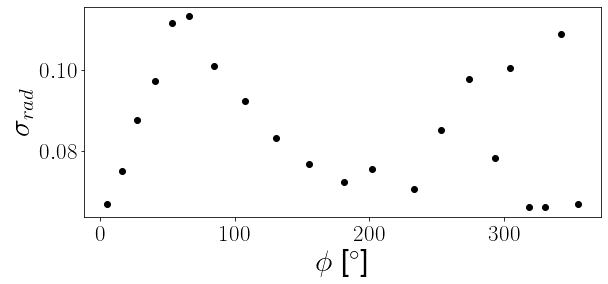

In [565]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.scatter(np.degrees(phiarray502), ((1-fsInb1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1-fpInb1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/(truebinvol.dvcsSimInb50nA_non1 +(1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1), color = 'k')
plt.xlabel(r"$\phi$" + " ["+degree+"]")
plt.ylabel(r"$\sigma_{rad}$")

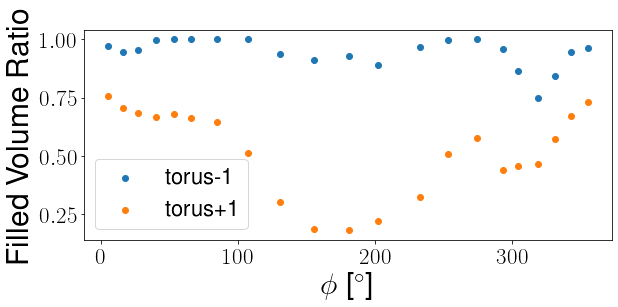

In [589]:
plt.scatter(np.degrees(phiarray502), truebinvol.binVolInb/truebinvol.binVol, label = 'torus-1')
plt.scatter(np.degrees(phiarray502), truebinvol.binVolOutb/truebinvol.binVol, label = 'torus+1')
plt.xlabel(r"$\phi$"+" ["+degree+"]")
plt.ylabel("Filled Volume Ratio")
plt.legend(loc = 'best')

In [583]:
truebinvol.loc[truebinvol.binVolInb>truebinvol.binVol, "binVolInb"] = truebinvol.binVol

In [81]:
def visualize(df_global, Q2xBtbin, config = 1, colName = "new", title = "", sub = None, scale = 'linear', errorbar = True):
    if not Q2xBtbin in goodBins:
        print("invalid bin number.")
        return False
    df = df_global.loc[df_global.Q2xBt==Q2xBtbin]
    bins_i = df.phi_i.to_numpy()
    bins_f = df.phi_f.to_numpy()
    bins_i = np.insert(bins_i, 0, 0)
    bins_i = np.insert(bins_i, len(bins_i), bins_f[-1])
    bins_f = np.insert(bins_f, 0, bins_i[1])
    bins_f = np.insert(bins_f, len(bins_f), 360)
    bincenters = np.array([0.5 * (bins_i[i] + bins_f[i]) for i in range(len(bins_i))])
    if config in [1, 2, 3]:
        entries = df.loc[:, colName+str(config)].to_numpy()
    elif config == "all":
        entries1 = df.loc[:, colName+"1"].to_numpy()
        entries2 = df.loc[:, colName+"2"].to_numpy()
        entries3 = df.loc[:, colName+"3"].to_numpy()
        entries = entries1 + entries2 + entries3
    print(entries)
    entries = np.insert(entries, 0, 0)
    entries = np.insert(entries, len(entries), 0)
    print(entries)
    plt.step(bincenters, entries, where = 'mid', color = 'k')
    if errorbar:
        plt.errorbar(bincenters, entries, yerr = np.sqrt(entries), color = 'k', linestyle = '')
    if config == "all":
        entries1 = np.insert(entries1, 0, 0)
        entries1 = np.insert(entries1, len(entries1), 0)
        entries2 = np.insert(entries2, 0, 0)
        entries2 = np.insert(entries2, len(entries2), 0)
        entries3 = np.insert(entries3, 0, 0)
        entries3 = np.insert(entries3, len(entries3), 0)
        if sub:
            plt.step(bincenters, entries1, where = 'mid', color = 'r')
            plt.step(bincenters, entries2, where = 'mid', color = 'g')
            plt.step(bincenters, entries3, where = 'mid', color = 'b')
    plt.xlim([0, 360])
    plt.xticks([0, 90, 180, 270, 360])
    plt.xlabel(r"$\phi$"+ " ["+degree+"]")
    if title:
        plt.title(title)
    else:
        plt.title(colName + str(config) + "\t" + str(Q2xBtbin))
    if scale == 'log':
        plt.yscale('log')
        plt.ylim([0.005, 1])
    plt.show()

[219 167  94  90  57  69  68  42  19  14  18  14  19  39  41  41  23  35
  74 153 247]
[  0 219 167  94  90  57  69  68  42  19  14  18  14  19  39  41  41  23
  35  74 153 247   0]


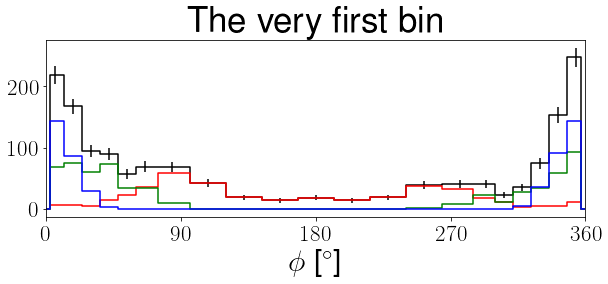

In [378]:
visualize(df_global, "502", config = "all", sub = True, colName = "epgExpOutb", title= "The very first bin")

In [88]:
def numberingGenDF(total, Q2bin_i=Q2bin_i, Q2bin_f=Q2bin_f, xBbin_i=xBbin_i, xBbin_f=xBbin_f, tbin_i=tbin_i, tbin_f=tbin_f, goodBins=goodBins, badBins=badBins, df_global=df_global):
    df_allBins = {}
    Q2xBtphi = 0

    for Q2bin in range(0, len(Q2bin_i)):#Q2 bin
        for xBbin in range(0, len(xBbin_i[Q2bin])):
            for tbin in range(0, len(tbin_i)):
                local = total
                Q2_i = Q2bin_i[Q2bin]
                Q2_f = Q2bin_f[Q2bin]
                xB_i = xBbin_i[Q2bin][xBbin]
                xB_f = xBbin_f[Q2bin][xBbin]
                t_i = tbin_i[tbin]
                t_f = tbin_f[tbin]
                #cut by Q2
                if Q2bin == len(Q2bin_i)-1:
                    local = local.loc[(local.GenQ2>=Q2_i) & (local.GenQ2<=Q2_f)]
                else:
                    local = local.loc[(local.GenQ2>=Q2_i) & (local.GenQ2<Q2_f)]
                #cut by xB
                #xB lower bound
                if xBbin == 0:
                    local = local.loc[local.GenQ2<=2*M*(10.604-2)*local.GenxB, :]
                else:
                    local = local.loc[local.GenxB>=xB_i] 
                #xB upper bound
                if (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 3):
                    local = local.loc[local.GenQ2>=2*M*3*local.GenxB]
                elif (xBbin == len(xBbin_i[Q2bin])-1) & (Q2bin < 5):
                    local = local.loc[local.GenQ2>=(4 - M*M)*local.GenxB/(1 - local.GenxB)]
                else:
                    local = local.loc[local.GenxB<xB_f]
                #cut by t
                if tbin == len(tbin_i)-1:
                    local = local.loc[(local.Gent2>=t_i) & (local.Gent2<=t_f)]
                else:
                    local = local.loc[(local.Gent2>=t_i) & (local.Gent2<t_f)]
                Q2xBtbin = "{}{}{}".format(Q2bin,xBbin,tbin)
                
                if Q2xBtbin in badBins:
                    continue

#                 phibin_i = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_i"].to_numpy()
#                 phibin_f = df_global.loc[(df_global.Q2xBt == Q2xBtbin), "phi_f"].to_numpy()
#                 phibin_f[-1] = 360
                for phi_ind in range(0, len(phibin_i)):
                    local.loc[:, "GenxBbin"] = xBbin
                    local.loc[:, "GenQ2bin"] = Q2bin
                    local.loc[:, "Gentbin"] = tbin
                    local.loc[:, "Genphibin"] = phi_ind
                    local.loc[:, "GenQ2xBtbin"] = Q2xBtbin
                    local.loc[:, "GenQ2xBtphi"] = Q2xBtphi
                    df_allBins[Q2xBtphi] = local.loc[(local.Genphi2>=phibin_i[phi_ind])&(local.Genphi2<phibin_f[phi_ind])]
                    Q2xBtphi += 1

    total = pd.concat(df_allBins.values()).sort_values( by = 'event')
    return total

In [89]:
df_3987_corr = numberingDF(df_3987_corr)
gen = numberingGenDF(df_3987_corr)
df_3987_corr.loc[(df_3987_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [90]:
df_4124_corr = numberingDF(df_4124_corr)
gen = numberingGenDF(df_4124_corr)
df_4124_corr.loc[(df_4124_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:,  ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [91]:
df_4139_corr = numberingDF(df_4139_corr)
gen = numberingGenDF(df_4139_corr)
df_4139_corr.loc[(df_4139_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [92]:
df_4181_corr = numberingDF(df_4181_corr)
gen = numberingGenDF(df_4181_corr)
df_4181_corr.loc[(df_4181_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [93]:
df_4182_corr = numberingDF(df_4182_corr)
gen = numberingGenDF(df_4182_corr)
df_4182_corr.loc[(df_4182_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [163]:
df_4238_corr = numberingDF(df_4238_corr)
gen = numberingGenDF(df_4238_corr)
df_4238_corr.loc[(df_4238_corr.event).isin(gen.event), ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]] = gen.loc[:, ["GenxBbin", "GenQ2bin", "Gentbin", "Genphibin", "GenQ2xBtbin", "GenQ2xBtphi"]]

In [37]:
df_4076_1g_corr = numberingDF(df_4076_1g_corr)
df_4202_1g_corr = numberingDF(df_4202_1g_corr)
df_4209_1g_corr = numberingDF(df_4209_1g_corr)

In [38]:
df_4076_2g_corr = numberingDF(df_4076_2g_corr)
df_4202_2g_corr = numberingDF(df_4202_2g_corr)
df_4209_2g_corr = numberingDF(df_4209_2g_corr)

In [39]:
exp_2g_corr = numberingDF(exp_2g_corr)

In [164]:
pi0ExpInb = copy(exp_2g_corr)
dvcsSimInb = pd.concat([df_3987_corr, df_4124_corr, df_4139_corr, df_4181_corr, df_4182_corr])
bkgSimInb = pd.concat([df_4076_1g_corr, df_4202_1g_corr, df_4209_1g_corr])
pi0SimInb = pd.concat([df_4076_2g_corr, df_4202_2g_corr, df_4209_2g_corr])
bhSimInb = df_4238_corr

In [165]:
df_global = countDF(pi0ExpInb, df_global, "pi0ExpInb")
df_global = countDF(dvcsSimInb, df_global, "dvcsSimInb")
df_global = countDF(bkgSimInb, df_global, "bkgSimInb")
df_global = countDF(pi0SimInb, df_global, "pi0SimInb")
df_global = countDF(bhSimInb, df_global, "bhSimInb")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [377]:
local502.loc[local502.index == 1281].epgExpInb1

1281    56
Name: epgExpInb1, dtype: int64

In [314]:
local502 = df_global.loc[df_global.Q2xBt == "502"]

In [326]:
local502.pi0SimInb1

1281     50
1282     21
1283     19
1284     39
1285     63
1286    120
1287    358
1288    309
1289    197
1290    274
1291    320
1292    212
1293    209
1294    128
1295     97
1296     55
1297     31
1298     32
1299     15
1300     42
1301     39
Name: pi0SimInb1, dtype: int64

In [490]:
parent_MC_bkg2g = "/Volumes/Extreme SSD/Feb2022/convPkl_outb/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/Feb2022/convPkl_outb/exp/"

df_4243_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4243.pkl")
df_4271_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4271.pkl")
df_4290_2g_corr = pd.read_pickle(parent_MC_bkg2g + "4290.pkl")

pi0SimOutb = pd.concat([df_4243_2g_corr, df_4271_2g_corr, df_4290_2g_corr])

pi0ExpOutb = pd.read_pickle(parent_exp + "pi0.pkl")

In [343]:
contInbFD1 = (local502.pi0ExpInb1/local502.pi0SimInb1)*local502.bkgSimInb1
contInbFD1unc = contInbFD1 * np.sqrt(1/local502.pi0ExpInb1 + 1/local502.pi0SimInb1 + 1/local502.bkgSimInb1)
contInbFD1unc.loc[contInbFD1==np.inf] = 0
contInbFD1unc.loc[np.isnan(contInbFD1)] = 0
contInbFD1.loc[contInbFD1==np.inf] = 0
contInbFD1.loc[np.isnan(contInbFD1)] = 0

contInbFD2 = sum(local502.pi0ExpInb1)/sum(local502.pi0SimInb1)*local502.bkgSimInb1
contInbFD2unc = contInbFD2 * np.sqrt(1/sum(local502.pi0ExpInb1) + 1/sum(local502.pi0SimInb1) + 1/local502.bkgSimInb1)
contInbFD2unc.loc[contInbFD2==np.inf] = 0
contInbFD2unc.loc[np.isnan(contInbFD2)] = 0
contInbFD2.loc[contInbFD2==np.inf] = 0
contInbFD2.loc[np.isnan(contInbFD2)] = 0

contInbFD3 = sum(df_global.pi0ExpInb1)/sum(df_global.pi0SimInb1)*local502.bkgSimInb1
contInbFD3unc = contInbFD3 * np.sqrt(1/sum(df_global.pi0ExpInb1) + 1/sum(df_global.pi0SimInb1) + 1/local502.bkgSimInb1)
contInbFD3unc.loc[contInbFD3==np.inf] = 0
contInbFD3unc.loc[np.isnan(contInbFD3)] = 0
contInbFD3.loc[contInbFD3==np.inf] = 0
contInbFD3.loc[np.isnan(contInbFD3)] = 0

contInbCD1 = (local502.pi0ExpInb2/local502.pi0SimInb2)*local502.bkgSimInb2
contInbCD1unc = contInbCD1 * np.sqrt(1/local502.pi0ExpInb2 + 1/local502.pi0SimInb2 + 1/local502.bkgSimInb2)
contInbCD1unc.loc[contInbCD1==np.inf] = 0
contInbCD1unc.loc[np.isnan(contInbCD1)] = 0
contInbCD1.loc[contInbCD1==np.inf] = 0
contInbCD1.loc[np.isnan(contInbCD1)] = 0

contInbCD2 = sum(local502.pi0ExpInb2)/sum(local502.pi0SimInb2)*local502.bkgSimInb2
contInbCD2unc = contInbCD2 * np.sqrt(1/sum(local502.pi0ExpInb2) + 1/sum(local502.pi0SimInb2) + 1/local502.bkgSimInb2)
contInbCD2unc.loc[contInbCD2==np.inf] = 0
contInbCD2unc.loc[np.isnan(contInbCD2)] = 0
contInbCD2.loc[contInbCD2==np.inf] = 0
contInbCD2.loc[np.isnan(contInbCD2)] = 0

contInbCD3 = sum(df_global.pi0ExpInb2)/sum(df_global.pi0SimInb2)*local502.bkgSimInb2
contInbCD3unc = contInbCD3 * np.sqrt(1/sum(df_global.pi0ExpInb2) + 1/sum(df_global.pi0SimInb2) + 1/local502.bkgSimInb2)
contInbCD3unc.loc[contInbCD3==np.inf] = 0
contInbCD3unc.loc[np.isnan(contInbCD3)] = 0
contInbCD3.loc[contInbCD3==np.inf] = 0
contInbCD3.loc[np.isnan(contInbCD3)] = 0

contInbCDFT1 = (local502.pi0ExpInb3/local502.pi0SimInb3)*local502.bkgSimInb3
contInbCDFT1unc = contInbCDFT1 * np.sqrt(1/local502.pi0ExpInb3 + 1/local502.pi0SimInb3 + 1/local502.bkgSimInb3)
contInbCDFT1unc.loc[contInbCDFT1==np.inf] = 0
contInbCDFT1unc.loc[np.isnan(contInbCDFT1)] = 0
contInbCDFT1.loc[contInbCDFT1==np.inf] = 0
contInbCDFT1.loc[np.isnan(contInbCDFT1)] = 0

contInbCDFT2 = sum(local502.pi0ExpInb3)/sum(local502.pi0SimInb3)*local502.bkgSimInb3
contInbCDFT2unc = contInbCDFT2 * np.sqrt(1/sum(local502.pi0ExpInb3) + 1/sum(local502.pi0SimInb3) + 1/local502.bkgSimInb3)
contInbCDFT2unc.loc[contInbCDFT2==np.inf] = 0
contInbCDFT2unc.loc[np.isnan(contInbCDFT2)] = 0
contInbCDFT2.loc[contInbCDFT2==np.inf] = 0
contInbCDFT2.loc[np.isnan(contInbCDFT2)] = 0

contInbCDFT3 = sum(df_global.pi0ExpInb3)/sum(df_global.pi0SimInb3)*local502.bkgSimInb3
contInbCDFT3unc = contInbCDFT3 * np.sqrt(1/sum(df_global.pi0ExpInb3) + 1/sum(df_global.pi0SimInb3) + 1/local502.bkgSimInb3)
contInbCDFT3unc.loc[contInbCDFT3==np.inf] = 0
contInbCDFT3unc.loc[np.isnan(contInbCDFT3)] = 0
contInbCDFT3.loc[contInbCDFT3==np.inf] = 0
contInbCDFT3.loc[np.isnan(contInbCDFT3)] = 0

In [492]:
contOutbFD1 = (local502.pi0ExpOutb1/local502.pi0SimOutb50nA1)*local502.bkgSimOutb50nA1
contOutbFD1unc = contOutbFD1 * np.sqrt(1/local502.pi0ExpOutb1 + 1/local502.pi0SimOutb50nA1 + 1/local502.bkgSimOutb50nA1)
contOutbFD1unc.loc[contOutbFD1==np.inf] = 0
contOutbFD1unc.loc[np.isnan(contOutbFD1)] = 0
contOutbFD1.loc[contOutbFD1==np.inf] = 0
contOutbFD1.loc[np.isnan(contOutbFD1)] = 0

contOutbFD2 = sum(local502.pi0ExpOutb1)/sum(local502.pi0SimOutb50nA1)*local502.bkgSimOutb50nA1
contOutbFD2unc = contOutbFD2 * np.sqrt(1/sum(local502.pi0ExpOutb1) + 1/sum(local502.pi0SimOutb50nA1) + 1/local502.bkgSimOutb50nA1)
contOutbFD2unc.loc[contOutbFD2==np.inf] = 0
contOutbFD2unc.loc[np.isnan(contOutbFD2)] = 0
contOutbFD2.loc[contOutbFD2==np.inf] = 0
contOutbFD2.loc[np.isnan(contOutbFD2)] = 0

contOutbFD3 = sum(pi0ExpOutb.config==1)/sum(pi0SimOutb.config==1)*local502.bkgSimOutb50nA1
contOutbFD3unc = contOutbFD3 * np.sqrt(1/sum(pi0ExpOutb.config==1) + 1/sum(pi0SimOutb.config==1) + 1/local502.bkgSimOutb50nA1)
contOutbFD3unc.loc[contOutbFD3==np.inf] = 0
contOutbFD3unc.loc[np.isnan(contOutbFD3)] = 0
contOutbFD3.loc[contOutbFD3==np.inf] = 0
contOutbFD3.loc[np.isnan(contOutbFD3)] = 0

contOutbCD1 = (local502.pi0ExpOutb2/local502.pi0SimOutb50nA2)*local502.bkgSimOutb50nA2
contOutbCD1unc = contOutbCD1 * np.sqrt(1/local502.pi0ExpOutb2 + 1/local502.pi0SimOutb50nA2 + 1/local502.bkgSimOutb50nA2)
contOutbCD1unc.loc[contOutbCD1==np.inf] = 0
contOutbCD1unc.loc[np.isnan(contOutbCD1)] = 0
contOutbCD1.loc[contOutbCD1==np.inf] = 0
contOutbCD1.loc[np.isnan(contOutbCD1)] = 0

contOutbCD2 = sum(local502.pi0ExpOutb2)/sum(local502.pi0SimOutb50nA2)*local502.bkgSimOutb50nA2
contOutbCD2unc = contOutbCD2 * np.sqrt(1/sum(local502.pi0ExpOutb2) + 1/sum(local502.pi0SimOutb50nA2) + 1/local502.bkgSimOutb50nA2)
contOutbCD2unc.loc[contOutbCD2==np.inf] = 0
contOutbCD2unc.loc[np.isnan(contOutbCD2)] = 0
contOutbCD2.loc[contOutbCD2==np.inf] = 0
contOutbCD2.loc[np.isnan(contOutbCD2)] = 0

contOutbCD3 = sum(pi0ExpOutb.config==2)/sum(pi0SimOutb.config==2)*local502.bkgSimOutb50nA2
contOutbCD3unc = contOutbCD3 * np.sqrt(1/sum(pi0ExpOutb.config==2) + 1/sum(pi0SimOutb.config==2) + 1/local502.bkgSimOutb50nA2)
contOutbCD3unc.loc[contOutbCD3==np.inf] = 0
contOutbCD3unc.loc[np.isnan(contOutbCD3)] = 0
contOutbCD3.loc[contOutbCD3==np.inf] = 0
contOutbCD3.loc[np.isnan(contOutbCD3)] = 0

contOutbCDFT1 = (local502.pi0ExpOutb3/local502.pi0SimOutb50nA3)*local502.bkgSimOutb50nA3
contOutbCDFT1unc = contOutbCDFT1 * np.sqrt(1/local502.pi0ExpOutb3 + 1/local502.pi0SimOutb50nA3 + 1/local502.bkgSimOutb50nA3)
contOutbCDFT1unc.loc[contOutbCDFT1==np.inf] = 0
contOutbCDFT1unc.loc[np.isnan(contOutbCDFT1)] = 0
contOutbCDFT1.loc[contOutbCDFT1==np.inf] = 0
contOutbCDFT1.loc[np.isnan(contOutbCDFT1)] = 0

contOutbCDFT2 = sum(local502.pi0ExpOutb3)/sum(local502.pi0SimOutb50nA3)*local502.bkgSimOutb50nA3
contOutbCDFT2unc = contOutbCDFT2 * np.sqrt(1/sum(local502.pi0ExpOutb3) + 1/sum(local502.pi0SimOutb50nA3) + 1/local502.bkgSimOutb50nA3)
contOutbCDFT2unc.loc[contOutbCDFT2==np.inf] = 0
contOutbCDFT2unc.loc[np.isnan(contOutbCDFT2)] = 0
contOutbCDFT2.loc[contOutbCDFT2==np.inf] = 0
contOutbCDFT2.loc[np.isnan(contOutbCDFT2)] = 0

contOutbCDFT3 = sum(pi0ExpOutb.config==3)/sum(pi0SimOutb.config==3)*local502.bkgSimOutb50nA3
contOutbCDFT3unc = contOutbCDFT3 * np.sqrt(1/sum(pi0ExpOutb.config==3) + 1/sum(pi0SimOutb.config==3) + 1/local502.bkgSimOutb50nA3)
contOutbCDFT3unc.loc[contOutbCDFT3==np.inf] = 0
contOutbCDFT3unc.loc[np.isnan(contOutbCDFT3)] = 0
contOutbCDFT3.loc[contOutbCDFT3==np.inf] = 0
contOutbCDFT3.loc[np.isnan(contOutbCDFT3)] = 0

In [621]:
contInbFD1unc.loc[contInbFD1unc==np.inf] = np.inf
contInbFD1unc.loc[np.isnan(contInbFD1unc)] = np.inf

contInbFD2unc.loc[contInbFD2unc==np.inf] = np.inf
contInbFD2unc.loc[np.isnan(contInbFD2unc)] = np.inf

contInbFD3unc.loc[contInbFD3unc==np.inf] = np.inf
contInbFD3unc.loc[np.isnan(contInbFD3unc)] = np.inf

contInbCD1unc.loc[contInbCD1unc==np.inf] = np.inf
contInbCD1unc.loc[np.isnan(contInbCD1unc)] = np.inf

contInbCD2unc.loc[contInbCD2unc==np.inf] = np.inf
contInbCD2unc.loc[np.isnan(contInbCD2unc)] = np.inf

contInbCD3unc.loc[contInbCD3unc==np.inf] = np.inf
contInbCD3unc.loc[np.isnan(contInbCD3unc)] = np.inf

contInbCDFT1unc.loc[contInbCDFT1unc==np.inf] = np.inf
contInbCDFT1unc.loc[np.isnan(contInbCDFT1unc)] = np.inf

contInbCDFT2unc.loc[contInbCDFT2unc==np.inf] = np.inf
contInbCDFT2unc.loc[np.isnan(contInbCDFT2unc)] = np.inf

contInbCDFT3unc.loc[contInbCDFT3unc==np.inf] = np.inf
contInbCDFT3unc.loc[np.isnan(contInbCDFT3unc)] = np.inf

contOutbFD1unc.loc[contOutbFD1unc==np.inf] = np.inf
contOutbFD1unc.loc[np.isnan(contOutbFD1unc)] = np.inf

contOutbFD2unc.loc[contOutbFD2unc==np.inf] = np.inf
contOutbFD2unc.loc[np.isnan(contOutbFD2unc)] = np.inf

contOutbFD3unc.loc[contOutbFD3unc==np.inf] = np.inf
contOutbFD3unc.loc[np.isnan(contOutbFD3unc)] = np.inf

contOutbCD1unc.loc[contOutbCD1unc==np.inf] = np.inf
contOutbCD1unc.loc[np.isnan(contOutbCD1unc)] = np.inf

contOutbCD2unc.loc[contOutbCD2unc==np.inf] = np.inf
contOutbCD2unc.loc[np.isnan(contOutbCD2unc)] = np.inf

contOutbCD3unc.loc[contOutbCD3unc==np.inf] = np.inf
contOutbCD3unc.loc[np.isnan(contOutbCD3unc)] = np.inf

contOutbCDFT1unc.loc[contOutbCDFT1unc==np.inf] = np.inf
contOutbCDFT1unc.loc[np.isnan(contOutbCDFT1unc)] = np.inf

contOutbCDFT2unc.loc[contOutbCDFT2unc==np.inf] = np.inf
contOutbCDFT2unc.loc[np.isnan(contOutbCDFT2unc)] = np.inf

contOutbCDFT3unc.loc[contOutbCDFT3unc==np.inf] = np.inf
contOutbCDFT3unc.loc[np.isnan(contOutbCDFT3unc)] = np.inf

In [622]:
contInbFD = (contInbFD1/contInbFD1unc**2 + contInbFD2/contInbFD2unc**2 + contInbFD3/contInbFD3unc**2) / (1/contInbFD1unc**2 + 1/contInbFD2unc**2 + 1/contInbFD3unc**2)
contInbFDunc = np.sqrt(1/(1/contInbFD1unc**2 + 1/contInbFD2unc**2 + 1/contInbFD3unc**2))

contInbCD = (contInbCD1/contInbCD1unc**2 + contInbCD2/contInbCD2unc**2 + contInbCD3/contInbCD3unc**2) / (1/contInbCD1unc**2 + 1/contInbCD2unc**2 + 1/contInbCD3unc**2)
contInbCDunc = np.sqrt(1/(1/contInbCD1unc**2 + 1/contInbCD2unc**2 + 1/contInbCD3unc**2))

contInbCDFT = (contInbCDFT1/contInbCDFT1unc**2 + contInbCDFT2/contInbCDFT2unc**2 + contInbCDFT3/contInbCDFT3unc**2) / (1/contInbCDFT1unc**2 + 1/contInbCDFT2unc**2 + 1/contInbCDFT3unc**2)
contInbCDFTunc = np.sqrt(1/(1/contInbCDFT1unc**2 + 1/contInbCDFT2unc**2 + 1/contInbCDFT3unc**2))

contOutbFD = (contOutbFD1/contOutbFD1unc**2 + contOutbFD2/contOutbFD2unc**2 + contOutbFD3/contOutbFD3unc**2) / (1/contOutbFD1unc**2 + 1/contOutbFD2unc**2 + 1/contOutbFD3unc**2)
contOutbFDunc = np.sqrt(1/(1/contOutbFD1unc**2 + 1/contOutbFD2unc**2 + 1/contOutbFD3unc**2))

contOutbCD = (contOutbCD1/contOutbCD1unc**2 + contOutbCD2/contOutbCD2unc**2 + contOutbCD3/contOutbCD3unc**2) / (1/contOutbCD1unc**2 + 1/contOutbCD2unc**2 + 1/contOutbCD3unc**2)
contOutbCDunc = np.sqrt(1/(1/contOutbCD1unc**2 + 1/contOutbCD2unc**2 + 1/contOutbCD3unc**2))

contOutbCDFT = (contOutbCDFT1/contOutbCDFT1unc**2 + contOutbCDFT2/contOutbCDFT2unc**2 + contOutbCDFT3/contOutbCDFT3unc**2) / (1/contOutbCDFT1unc**2 + 1/contOutbCDFT2unc**2 + 1/contOutbCDFT3unc**2)
contOutbCDFTunc = np.sqrt(1/(1/contOutbCDFT1unc**2 + 1/contOutbCDFT2unc**2 + 1/contOutbCDFT3unc**2))

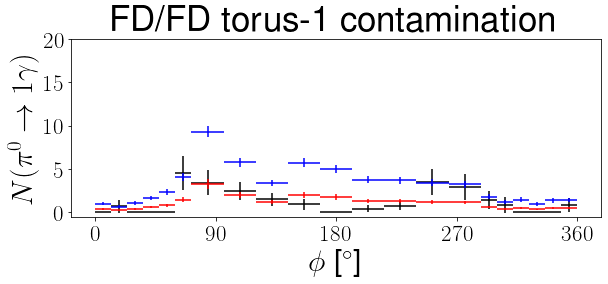

In [344]:
plt.errorbar(phibincenters, contInbFD1, yerr = c1unc, xerr= phibinwidths, linestyle = '', color = 'k')
plt.errorbar(phibincenters, contInbFD2, yerr = c2unc, xerr= phibinwidths, linestyle = '', color = 'r')
plt.errorbar(phibincenters, contInbFD3, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'b')
# plt.errorbar(phibincenters, local502.epgExpInb1, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'g')

plt.ylabel(r"$N(\pi^0\rightarrow 1\gamma)$" )
plt.xlabel(r"$\phi$"+" ["+degree+"]")

plt.title("FD/FD torus-1 contamination")

plt.xticks([0, 90, 180, 270, 360])
plt.yticks([0, 5, 10, 15, 20])
plt.show()

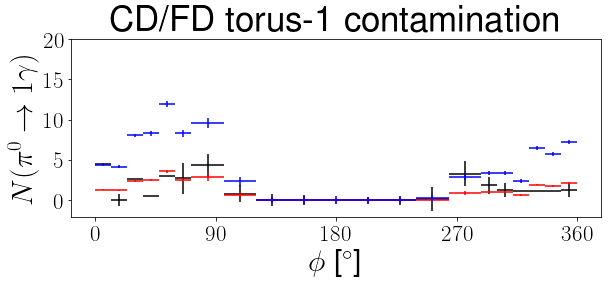

In [345]:
plt.errorbar(phibincenters, contInbCD1, yerr = c1unc, xerr= phibinwidths, linestyle = '', color = 'k')
plt.errorbar(phibincenters, contInbCD2, yerr = c2unc, xerr= phibinwidths, linestyle = '', color = 'r')
plt.errorbar(phibincenters, contInbCD3, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'b')
# plt.errorbar(phibincenters, local502.epgExpInb1, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'g')

plt.ylabel(r"$N(\pi^0\rightarrow 1\gamma)$" )
plt.xlabel(r"$\phi$"+" ["+degree+"]")

plt.title("CD/FD torus-1 contamination")

plt.xticks([0, 90, 180, 270, 360])
plt.yticks([0, 5, 10, 15])
plt.show()

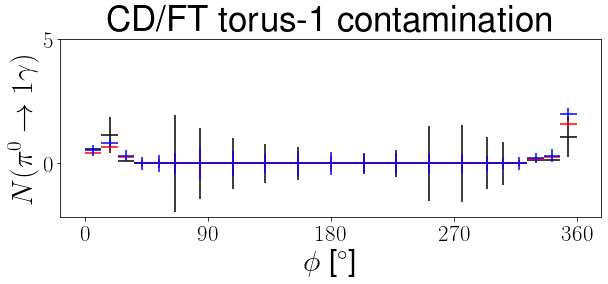

In [347]:
plt.errorbar(phibincenters, contInbCDFT1, yerr = c1unc, xerr= phibinwidths, linestyle = '', color = 'k')
plt.errorbar(phibincenters, contInbCDFT2, yerr = c2unc, xerr= phibinwidths, linestyle = '', color = 'r')
plt.errorbar(phibincenters, contInbCDFT3, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'b')
# plt.errorbar(phibincenters, local502.epgExpInb1, yerr = c3unc, xerr= phibinwidths, linestyle = '', color = 'g')

plt.ylabel(r"$N(\pi^0\rightarrow 1\gamma)$" )
plt.xlabel(r"$\phi$"+" ["+degree+"]")

plt.title("CD/FT torus-1 contamination")

plt.xticks([0, 90, 180, 270, 360])
plt.yticks([0, 5])
plt.show()

In [322]:
phibincenters = (np.array(phibin_i) + np.array(phibin_f))/2
phibinwidths = (np.array(phibin_f) - np.array(phibin_i))/2

In [298]:
import subprocess

In [299]:
def printBH(xB, Q2, t, phi):
    dstot = subprocess.check_output(['/Users/sangbaek/CLAS12/dvcs/print/dvcsgen', '--beam', '10.604', '--x', str(xB), str(xB), '--q2', str(Q2), str(Q2),'--t', str(t), str(t), '--bh', '1', '--phi', str(phi)])
    dstot = float(dstot.splitlines()[0].decode("utf-8"))
    return dstot

In [300]:
def printBHarray(xBarray, Q2array, tarray, phiarray):
    BHarray = []
    if isinstance(xBarray, pd.core.series.Series):
        xBarray = xBarray.to_numpy()
        Q2array = Q2array.to_numpy()
        tarray = tarray.to_numpy()
        phiarray = phiarray.to_numpy()
        
    for xB, Q2, t, phi in zip(xBarray, Q2array, tarray, phiarray):
        BHarray.append(printBH(xB, Q2, t, phi))
    return BHarray

In [446]:
epgExpInb503 = epgExpInb.loc[(epgExpInb.Q2xBtbin == "503")]
BHarray = printBHarray(epgExpInb503.xB, epgExpInb503.Q2, epgExpInb503.t1, epgExpInb503.phi1)
epgExpInb503.loc[:, "ds"] = np.array(BHarray)

xBmean = sum(epgExpInb503.xB * epgExpInb503.ds)/sum(epgExpInb503.ds)
Q2mean = sum(epgExpInb503.Q2 * epgExpInb503.ds)/sum(epgExpInb503.ds)
tmean = sum(epgExpInb503.t1 * epgExpInb503.ds)/sum(epgExpInb503.ds)


In [447]:
phiarray = np.linspace(0, 2*np.pi, 101)
dsarray = []
for phi in phiarray:
    dsarray.append(printBH(xBmean, Q2mean, tmean, phi))

In [350]:
text = ""
dsBH = []
xBarray502, Q2array502, tarray502, phiarray502 = [], [], [], []

for i in range(len(phibin_i)):
    epgExp503 = epgExp.loc[(epgExp.Q2xBtbin == "503") & (epgExp.phibin == i)]
    BHarray = printBHarray(epgExp503.xB, epgExp503.Q2, epgExp503.t1, epgExp503.phi1)
    epgExp503.loc[:, "ds"] = np.array(BHarray)
    xBmean = sum(epgExp503.xB * epgExp503.ds)/sum(epgExp503.ds)
    Q2mean = sum(epgExp503.Q2 * epgExp503.ds)/sum(epgExp503.ds)
    tmean = sum(epgExp503.t1 * epgExp503.ds)/sum(epgExp503.ds)
    phimean = sum(epgExp503.phi1 * epgExp503.ds)/sum(epgExp503.ds)*np.pi/180.0
    dsBH.append(printBH(xBmean, Q2mean, tmean, phimean))
    xBarray502.append(xBmean)
    Q2array502.append(Q2mean)
    tarray502.append(tmean)
    phiarray502.append(phimean)
    text += "./dvcsgen --x "+str(xBmean) + "  " + str(xBmean) +"  --q2 " +str(Q2mean) + "\t" + str(Q2mean) +  "  --t "+str(tmean) + "\t" + str(tmean) + "  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi " + str(phimean) +"| grep Frad_with_error \n"

In [351]:
print(text)

./dvcsgen --x 0.3059071699661789  0.3059071699661789  --q2 4.593552303077382	4.593552303077382  --t 0.4737312906120542	0.4737312906120542  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.09041322052962876| grep Frad_with_error 
./dvcsgen --x 0.30146561115807236  0.30146561115807236  --q2 4.554344177526905	4.554344177526905  --t 0.4761228782146512	0.4761228782146512  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.28918547622073465| grep Frad_with_error 
./dvcsgen --x 0.3008258179553323  0.3008258179553323  --q2 4.536373140229547	4.536373140229547  --t 0.4773456456080922	0.4773456456080922  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.4814660850211353| grep Frad_with_error 
./dvcsgen --x 0.3154410233898396  0.3154410233898396  --q2 4.578778493231084	4.578778493231084  --t 0.4736945885992648	0.4736945885992648  --bh 3 --gpd 101 --vv2cut 0.6 --delta 0.1 --printrad --phi 0.7098011130099536| grep Frad_with_error 
./dvcsgen --x 0.349932790853629  0.3

In [352]:
Frad = [0.95466832786641476, 0.95757584989701261, 0.95926524650585010, 0.95283050683161286, 0.93968690598505256, 0.94414565622797664, 0.93618995406226035, 0.93047726743526815, 0.92021982938491365, 0.91776286680775765, 0.91660014899432030, 0.91653926674206854, 0.92480109272730004, 0.92681365338828525, 0.93604635024317684, 0.94675753544745800, 0.94995690929521515, 0.96156244616215580, 0.96244686079057085, 0.95894050697928312, 0.95462273555447541]
Frad = np.array(Frad)

(0.8, 1.1)

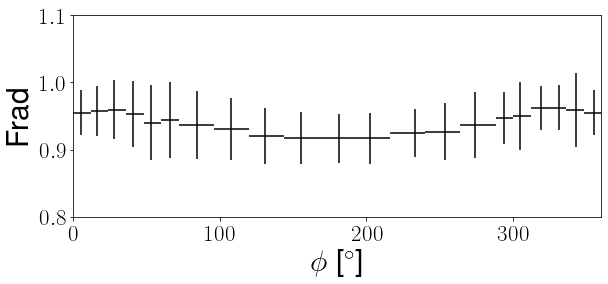

In [653]:
plt.rcParams["figure.figsize"] = (9, 4.5)
plt.errorbar(np.degrees(phiarray502), Frad, xerr = [np.degrees(phiarray502) - np.array(phibin_i), np.array(phibin_f) - np.degrees(phiarray502) ],yerr = ((1-fsInb1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1-fpInb1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/(truebinvol.dvcsSimInb50nA_non1 +(1)/fsInb1*truebinvol.dvcsSimInb50nA_sPeak1 + (1)/fpInb1*truebinvol.dvcsSimInb50nA_pPeak1)/2, color = 'k', linestyle = '')
plt.xlabel(r"$\phi$" +" ["+degree+"]")
plt.ylabel("Frad")
plt.xlim([0, 360])
plt.ylim([0.8, 1.1])

In [575]:
phiarray502 

[0.09041322052962876,
 0.28918547622073465,
 0.4814660850211353,
 0.7098011130099536,
 0.9299801363977592,
 1.1521503745344313,
 1.4782033089947924,
 1.8812590867093013,
 2.286472014179014,
 2.7088393506262496,
 3.1593501343707167,
 3.5265397141472397,
 4.0680381451357475,
 4.4206727060185935,
 4.783737661686157,
 5.124638400277914,
 5.314204820660995,
 5.567066461698056,
 5.7763730094843435,
 5.978464521942343,
 6.195935270494204]

In [482]:
tmean

0.47795157061349536